In [1]:
import matplotlib.pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist#
import scipy.optimize as opt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

pb.rcParams['figure.figsize'] = (32.0,24.0)
pb.rcParams['font.size'] = 24

# Question 12: Linear regression

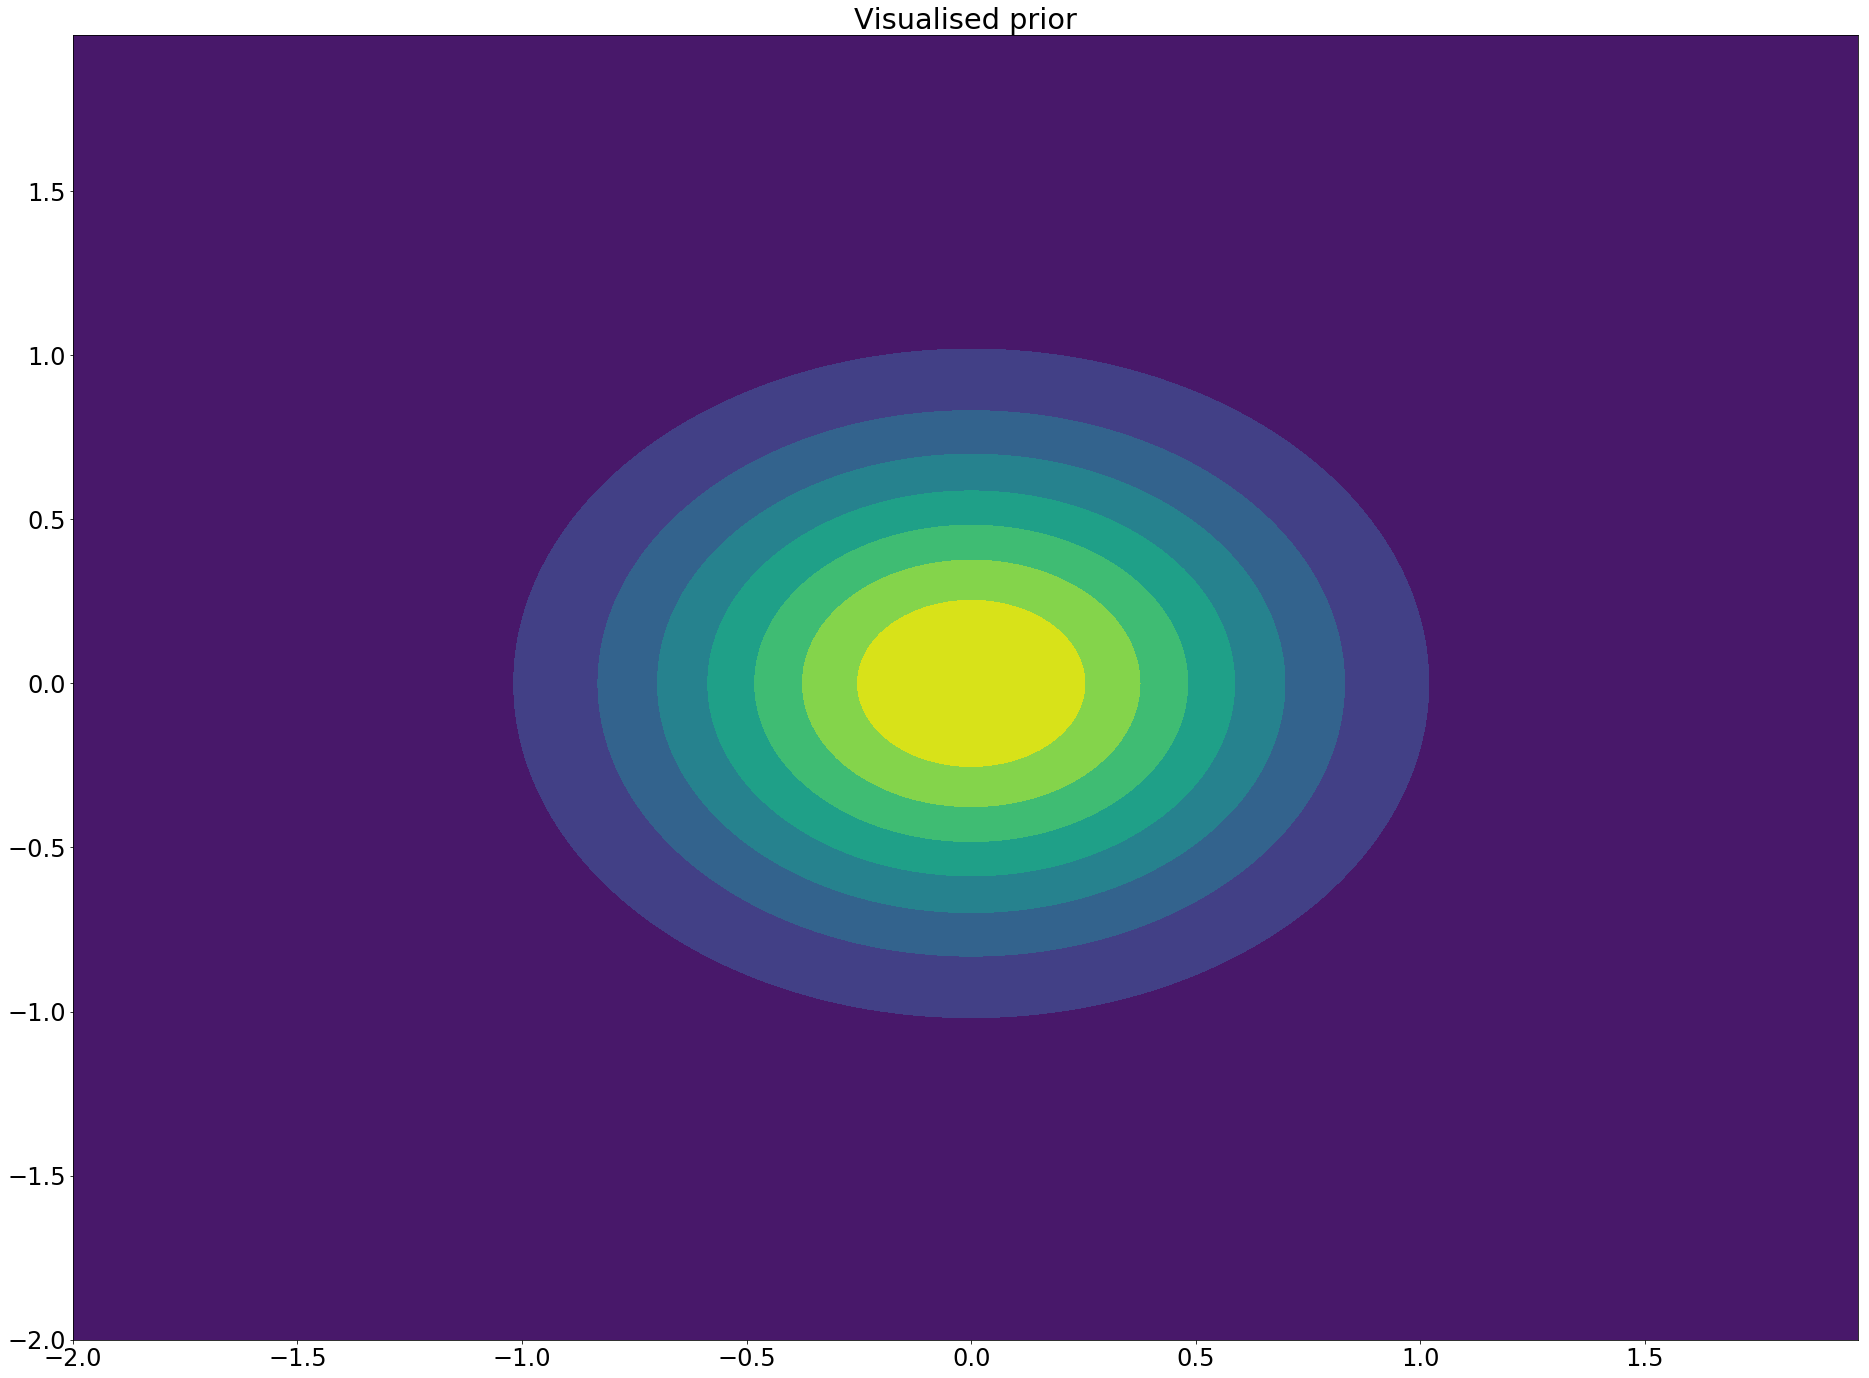

In [2]:

delta = 0.025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
plt.figure()
CS = plt.contourf(X, Y, Z1)
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Visualised prior')
plt.show()


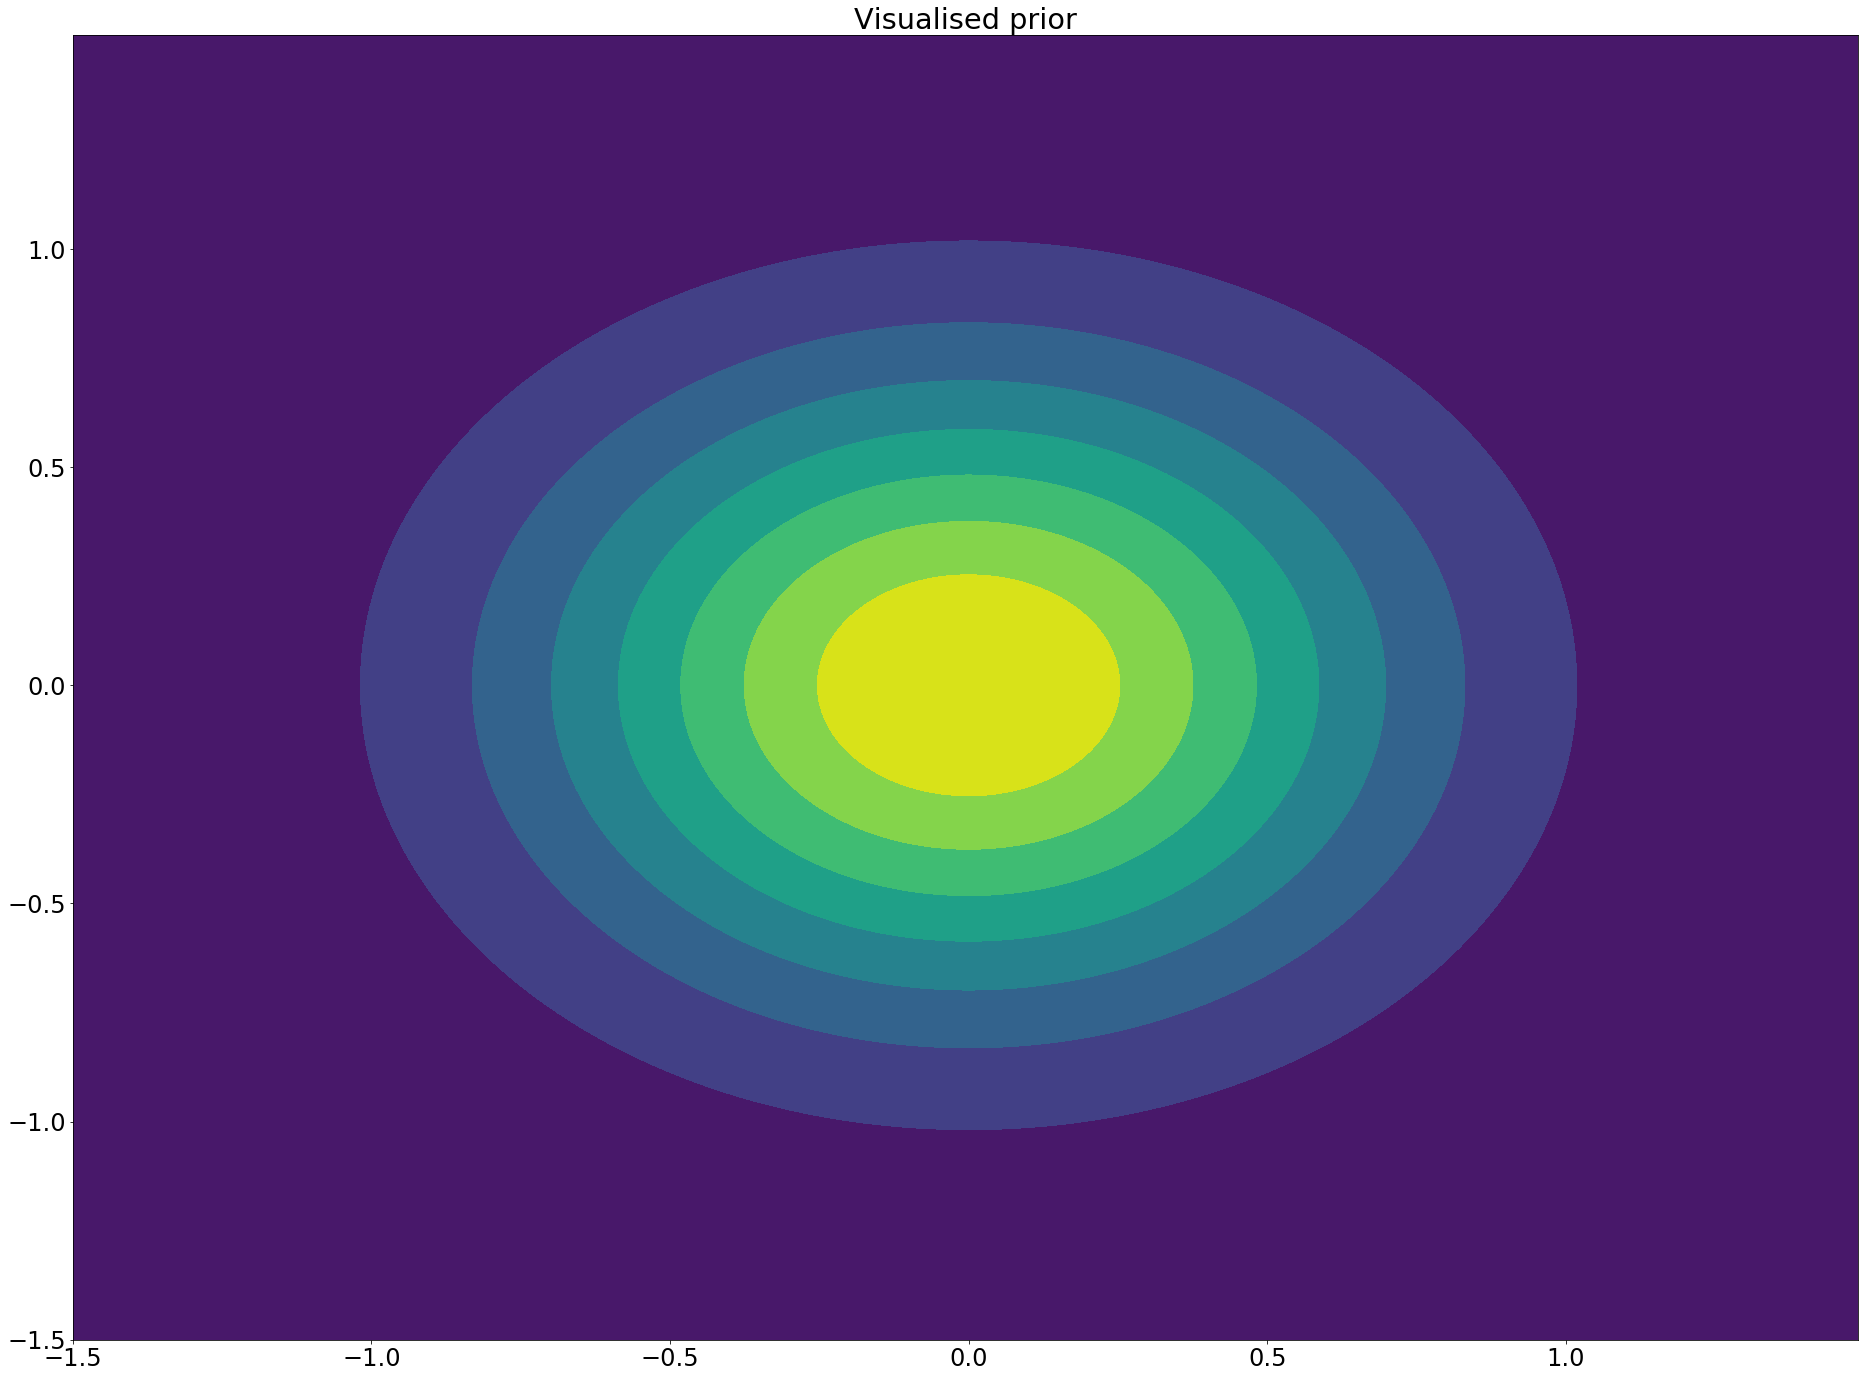

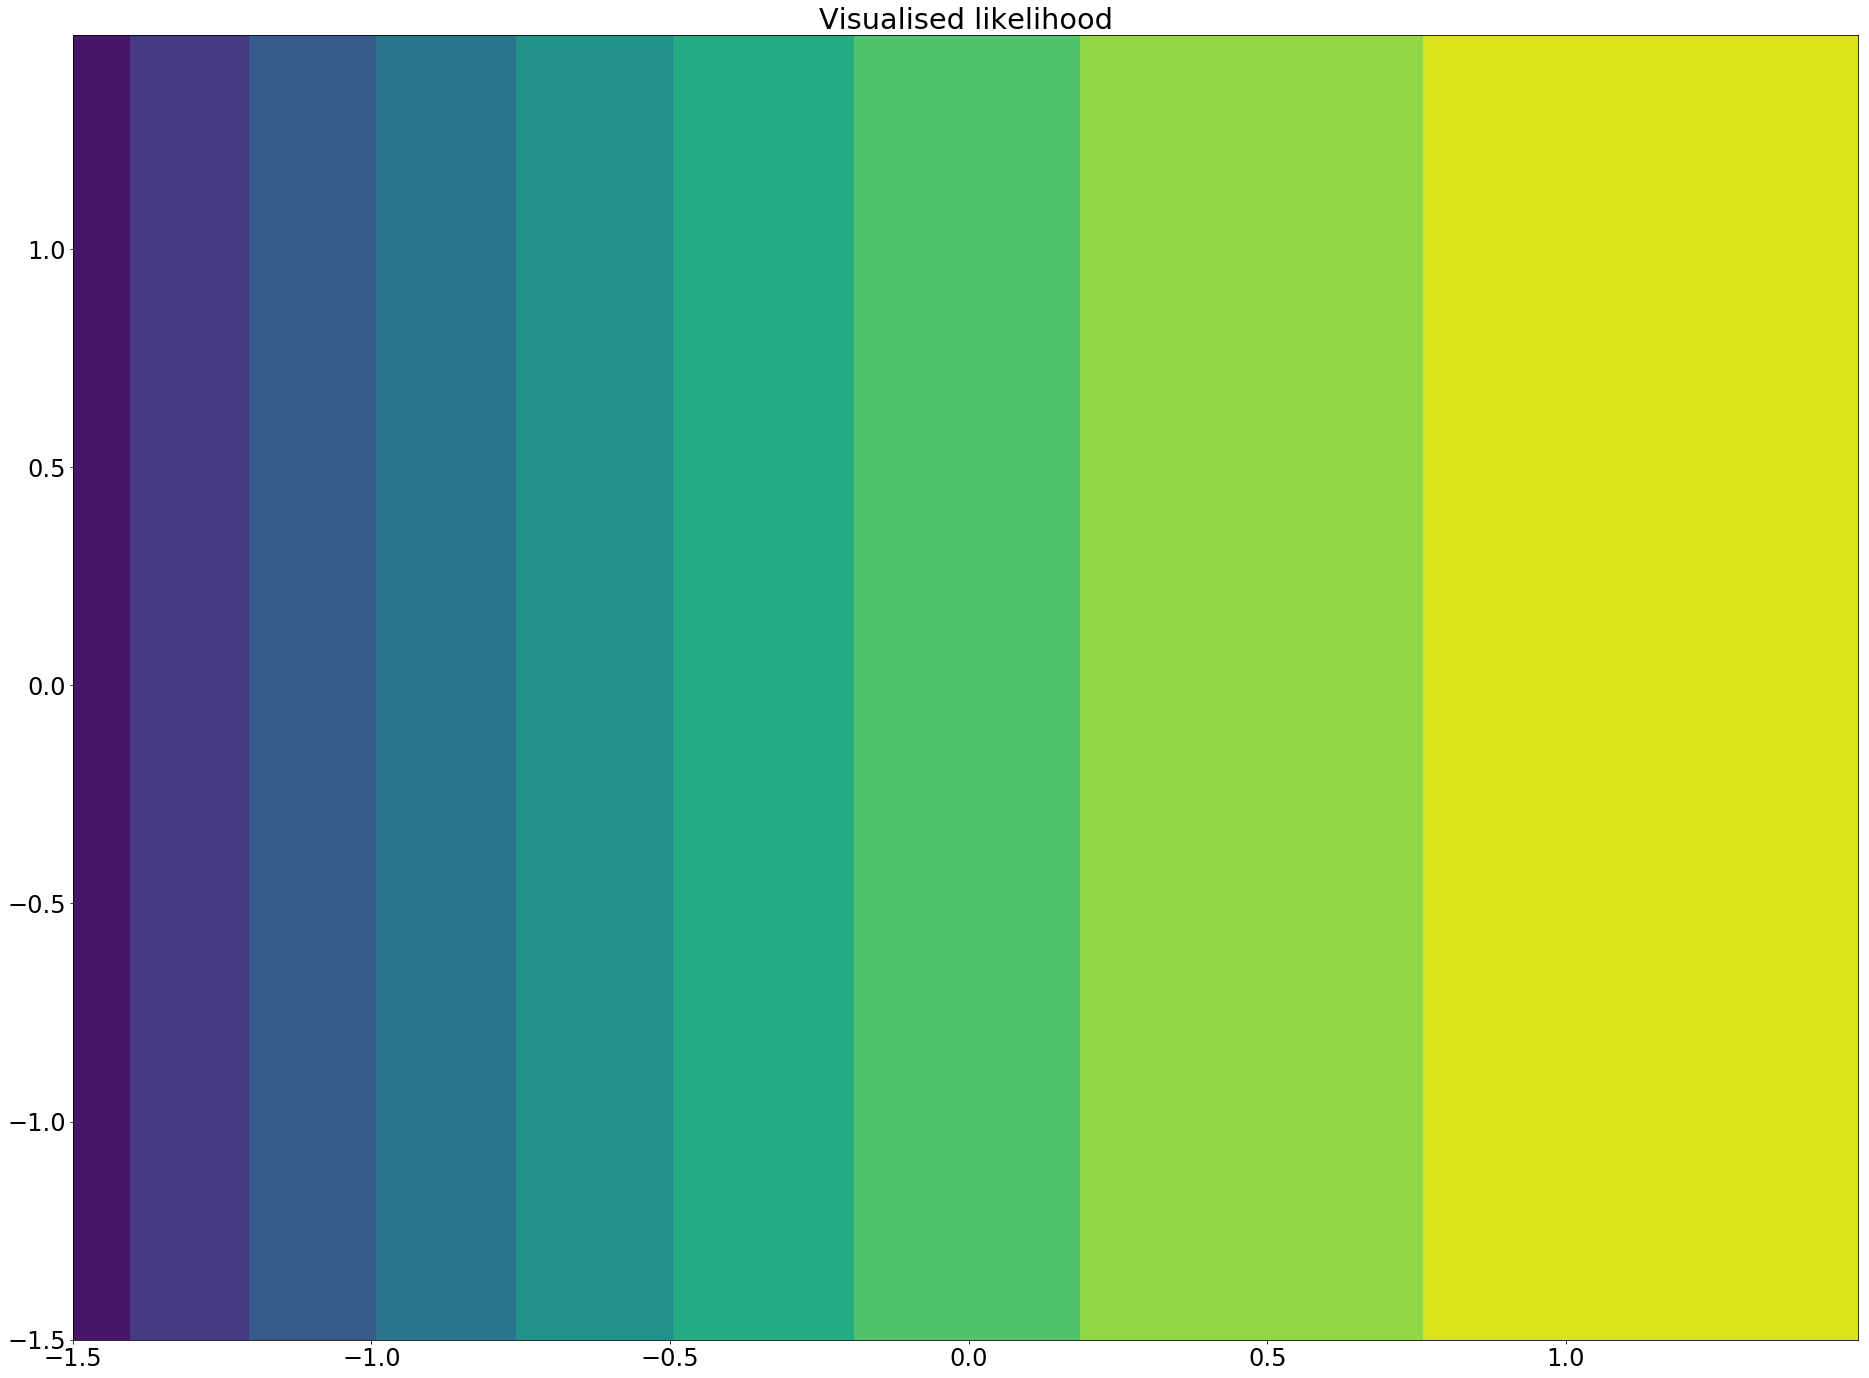

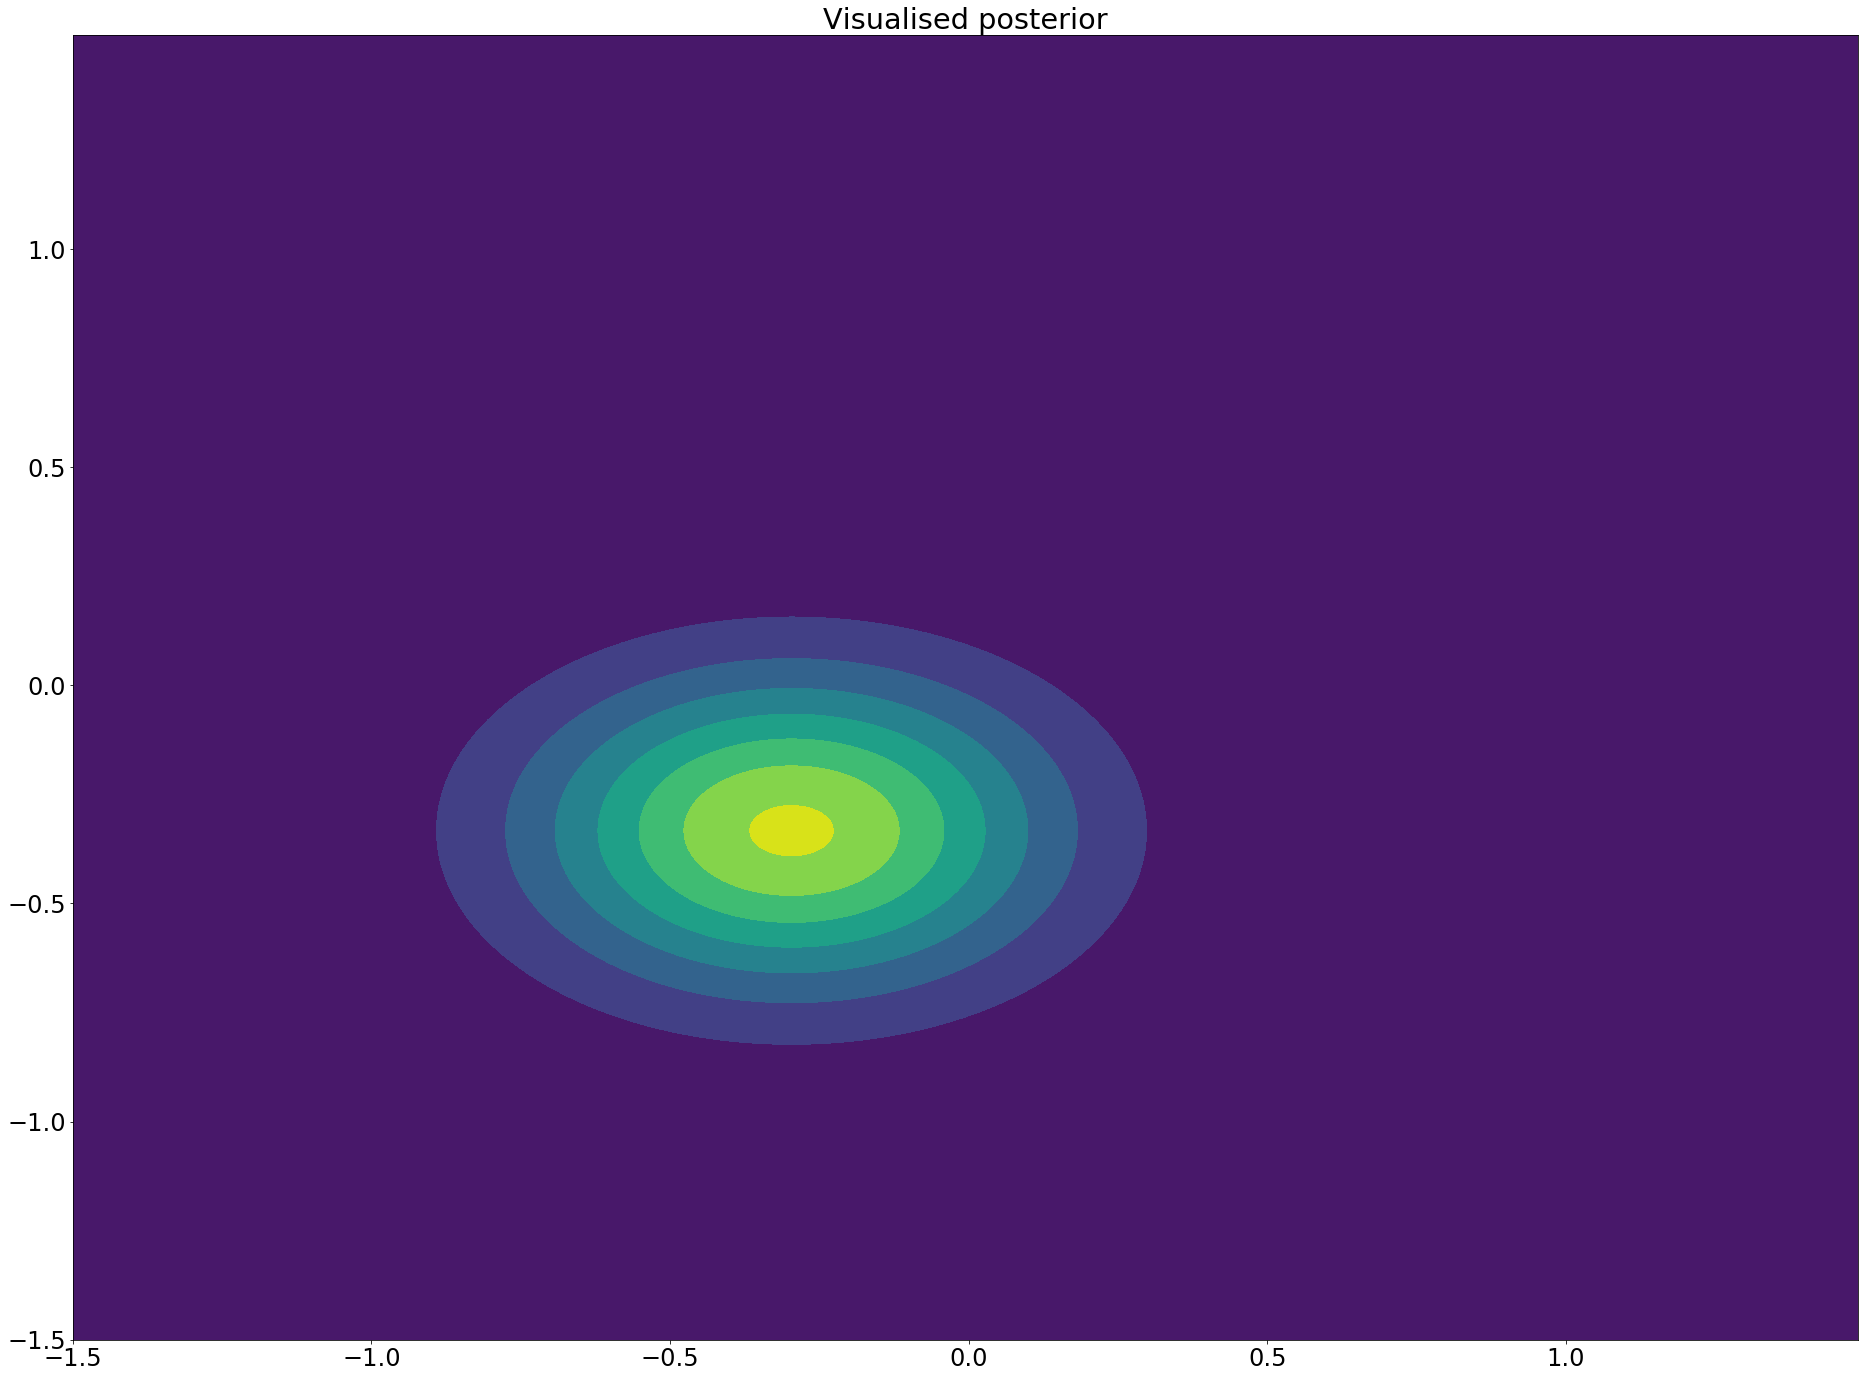

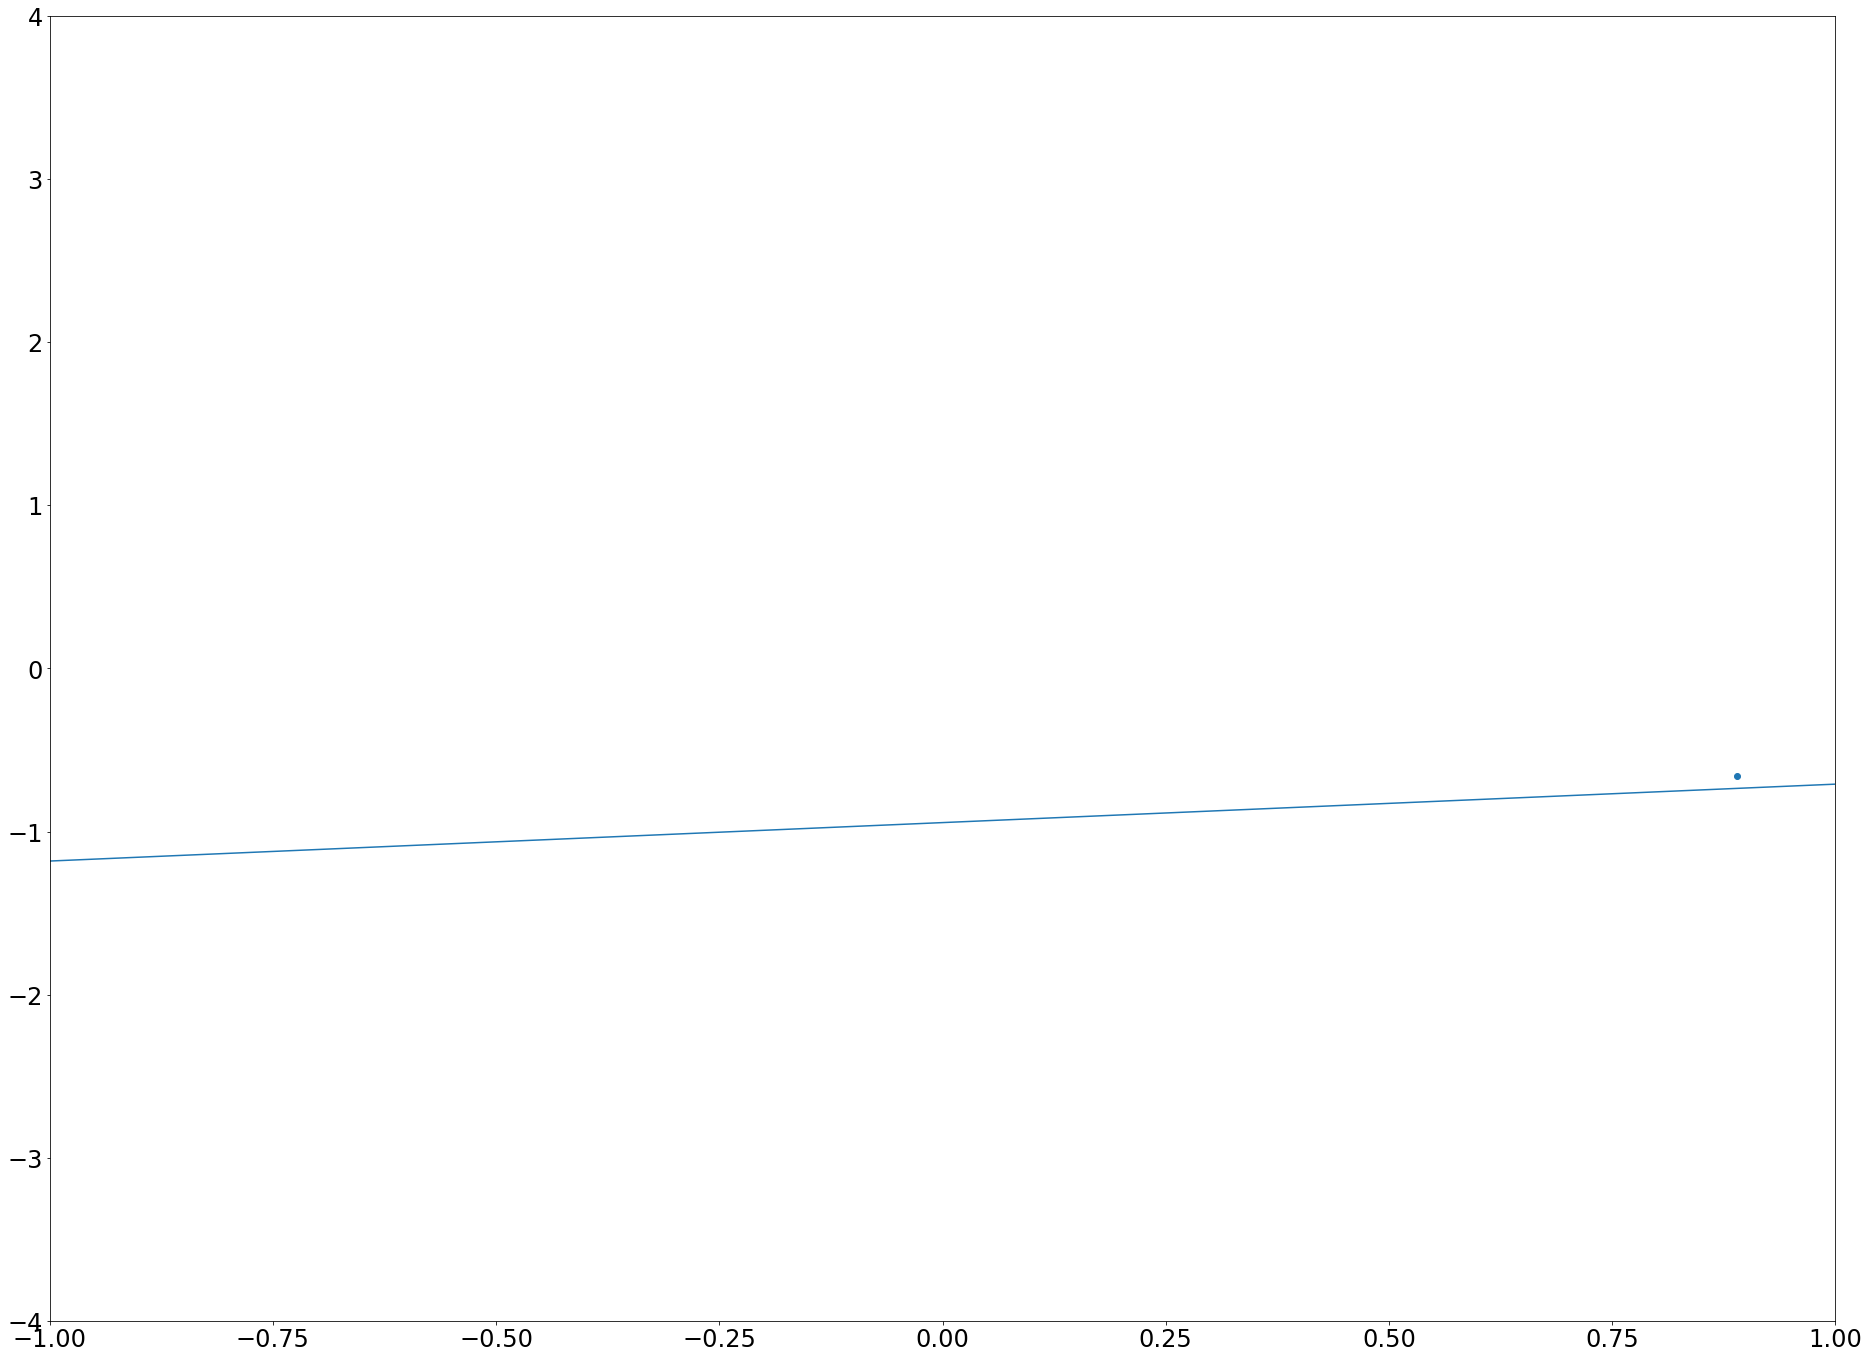

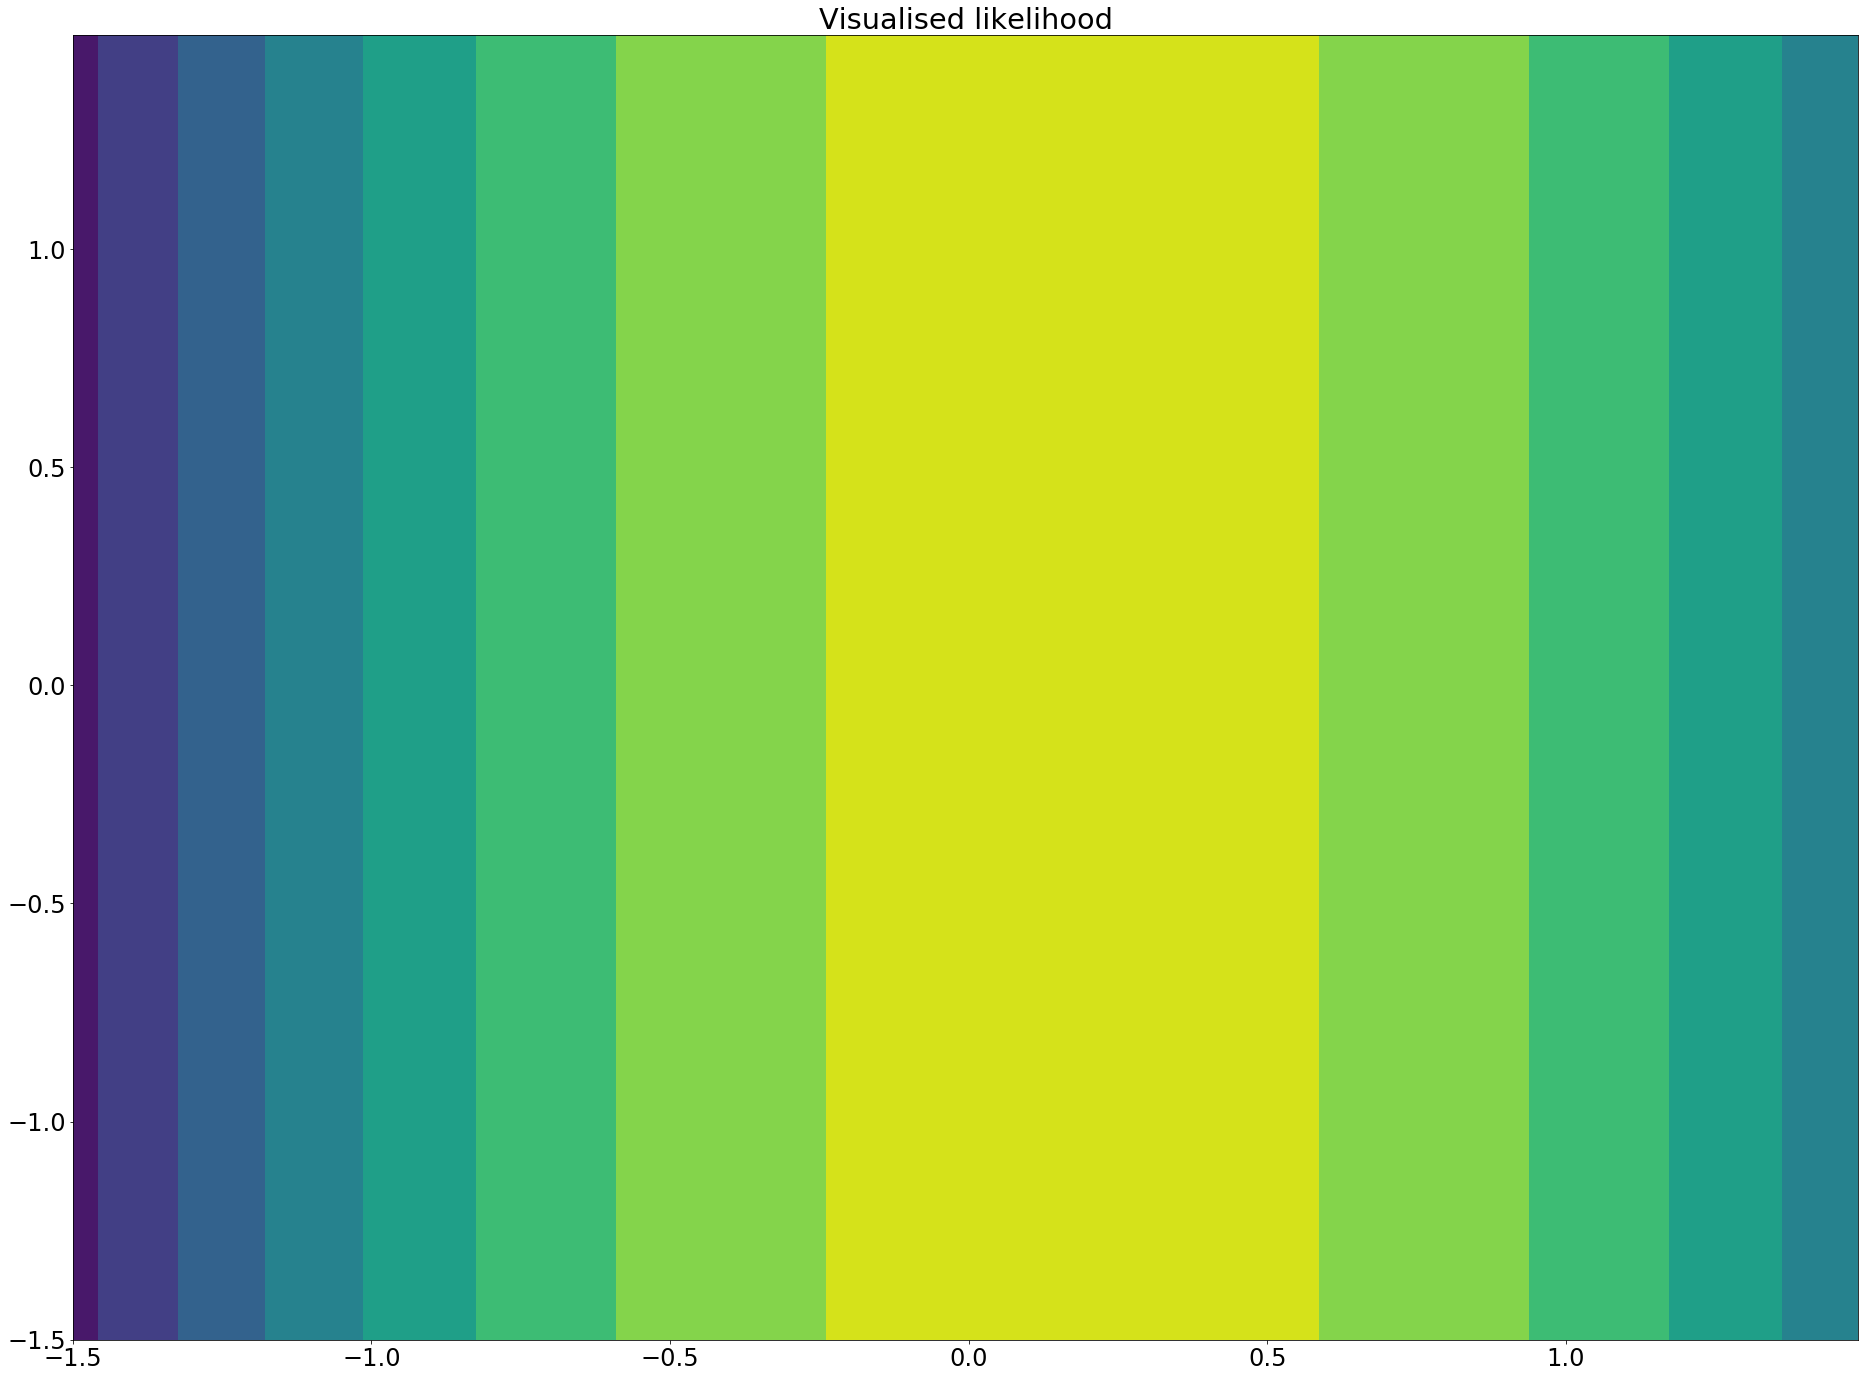

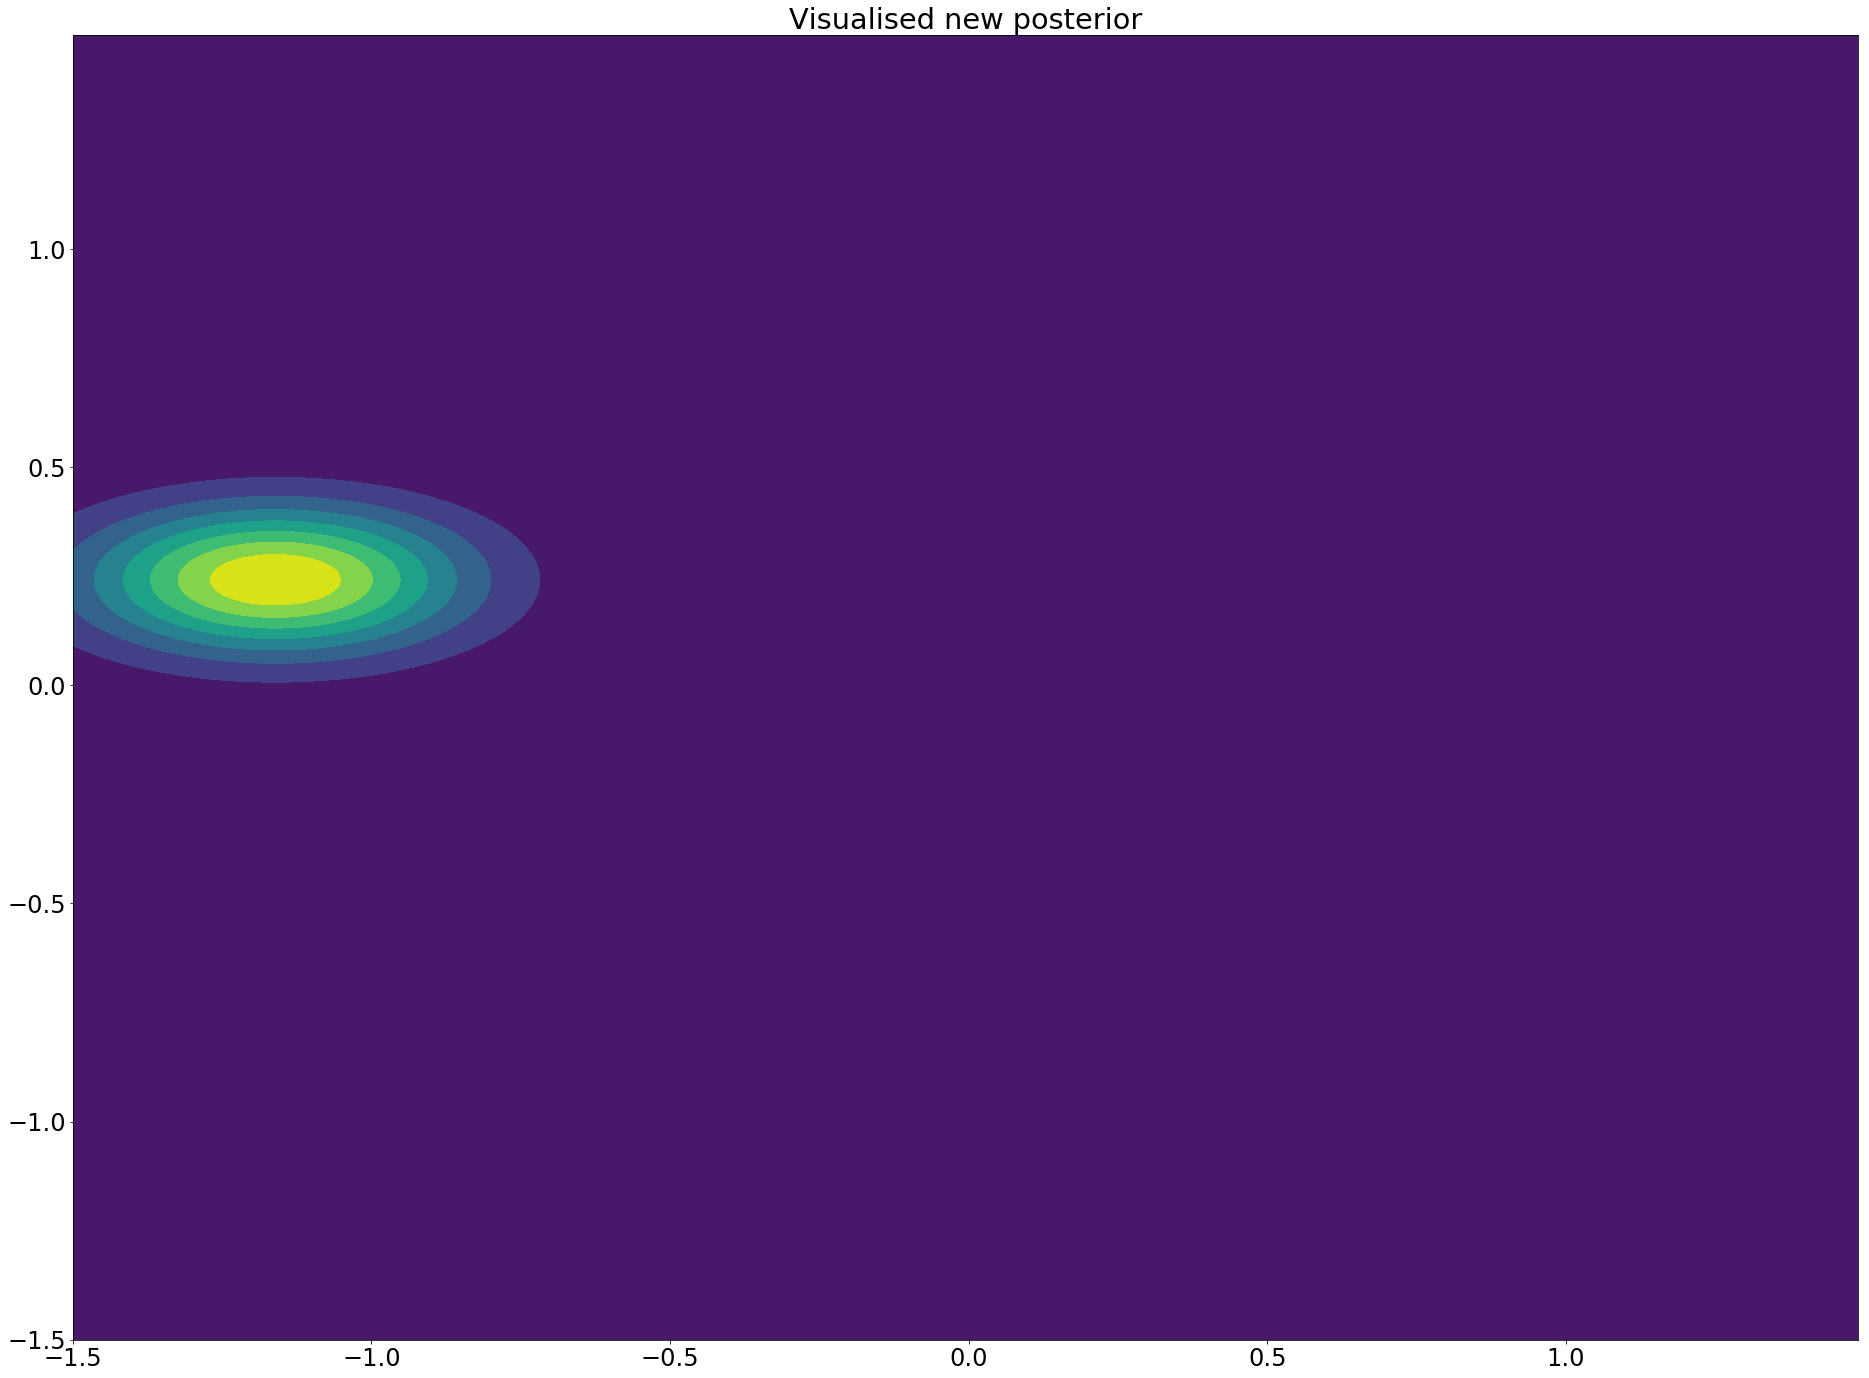

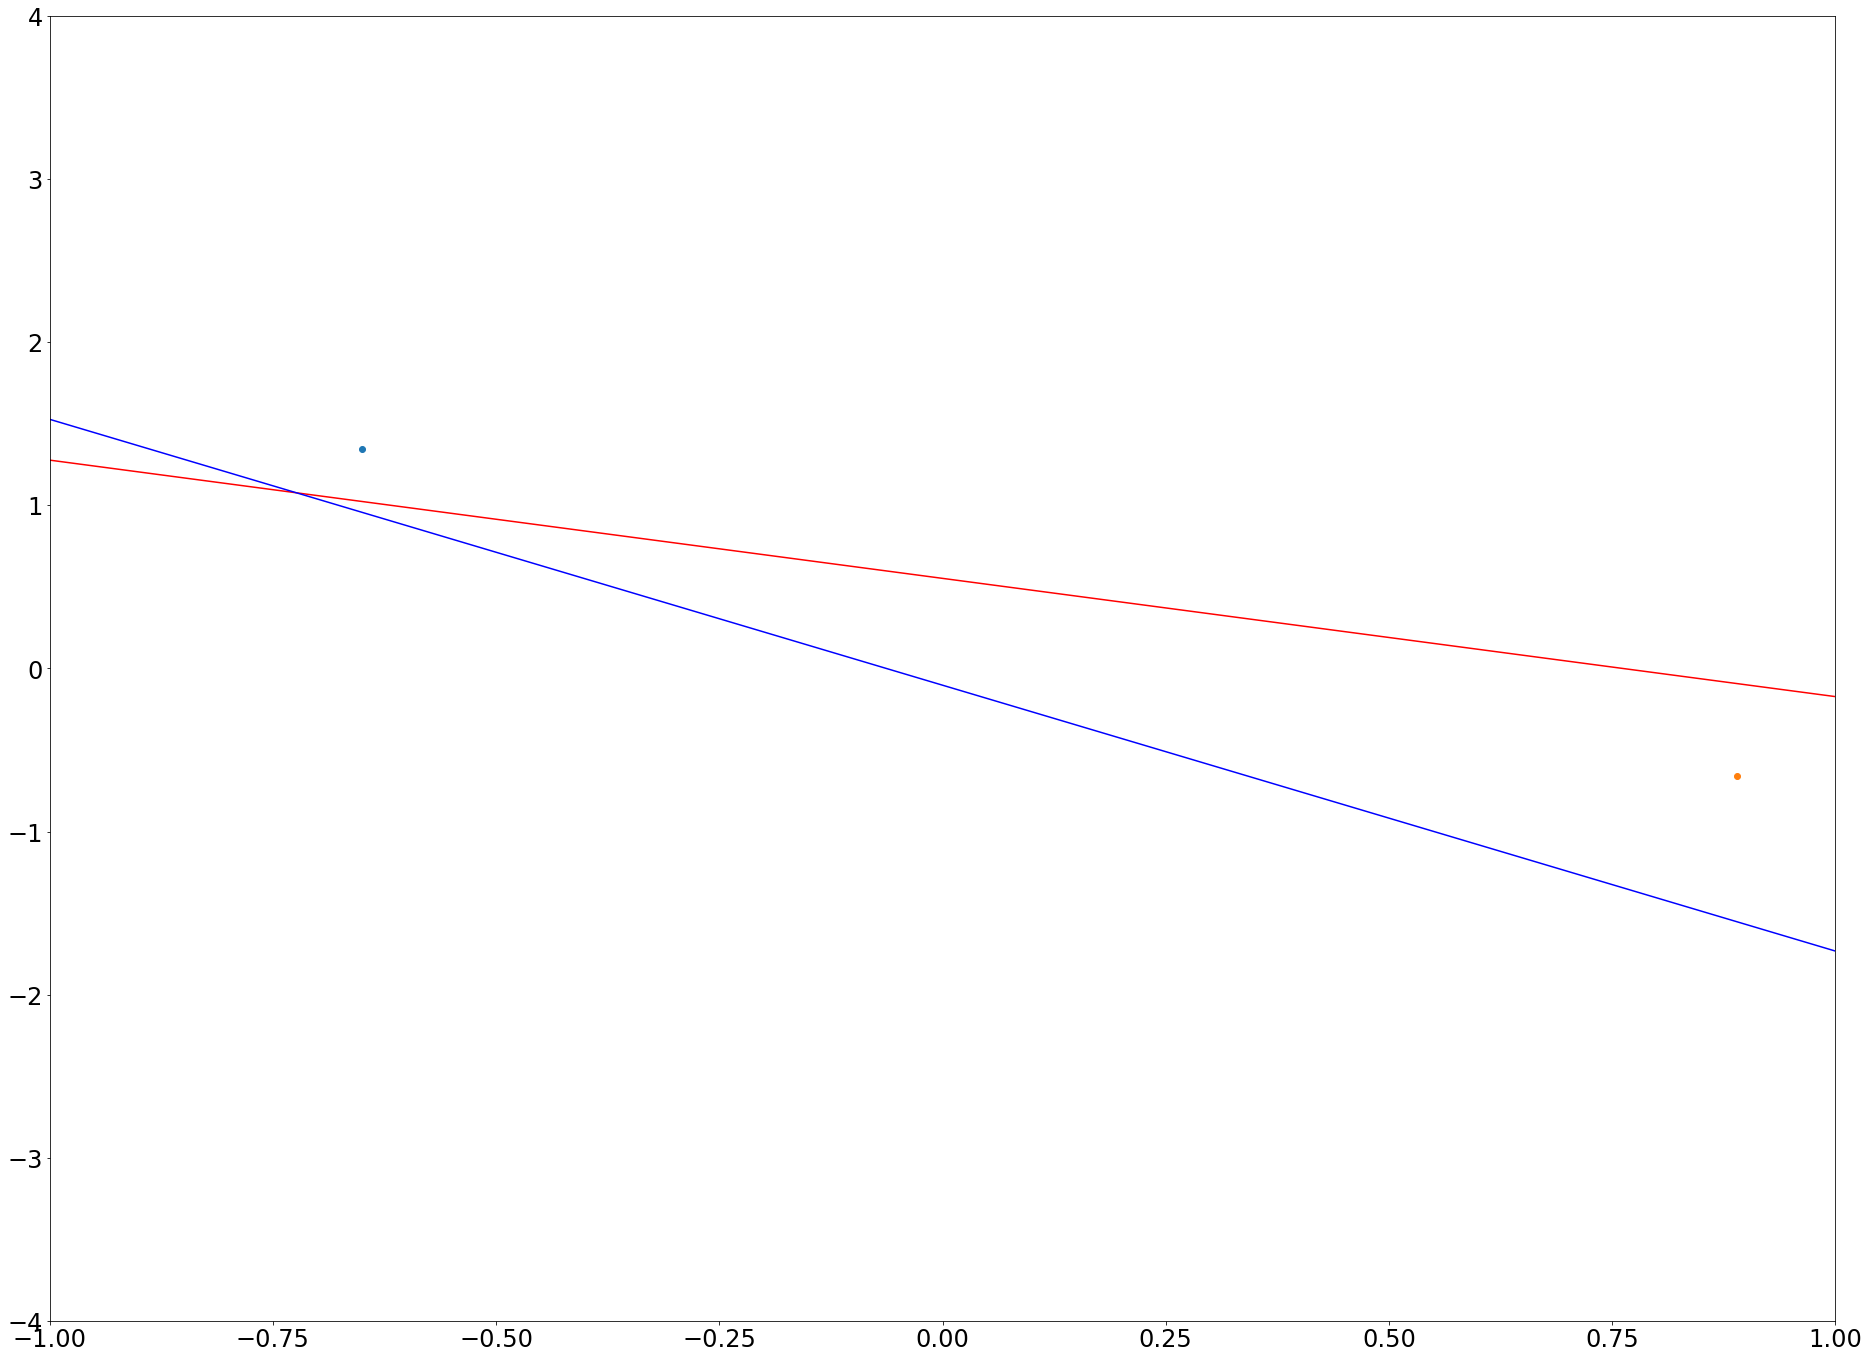

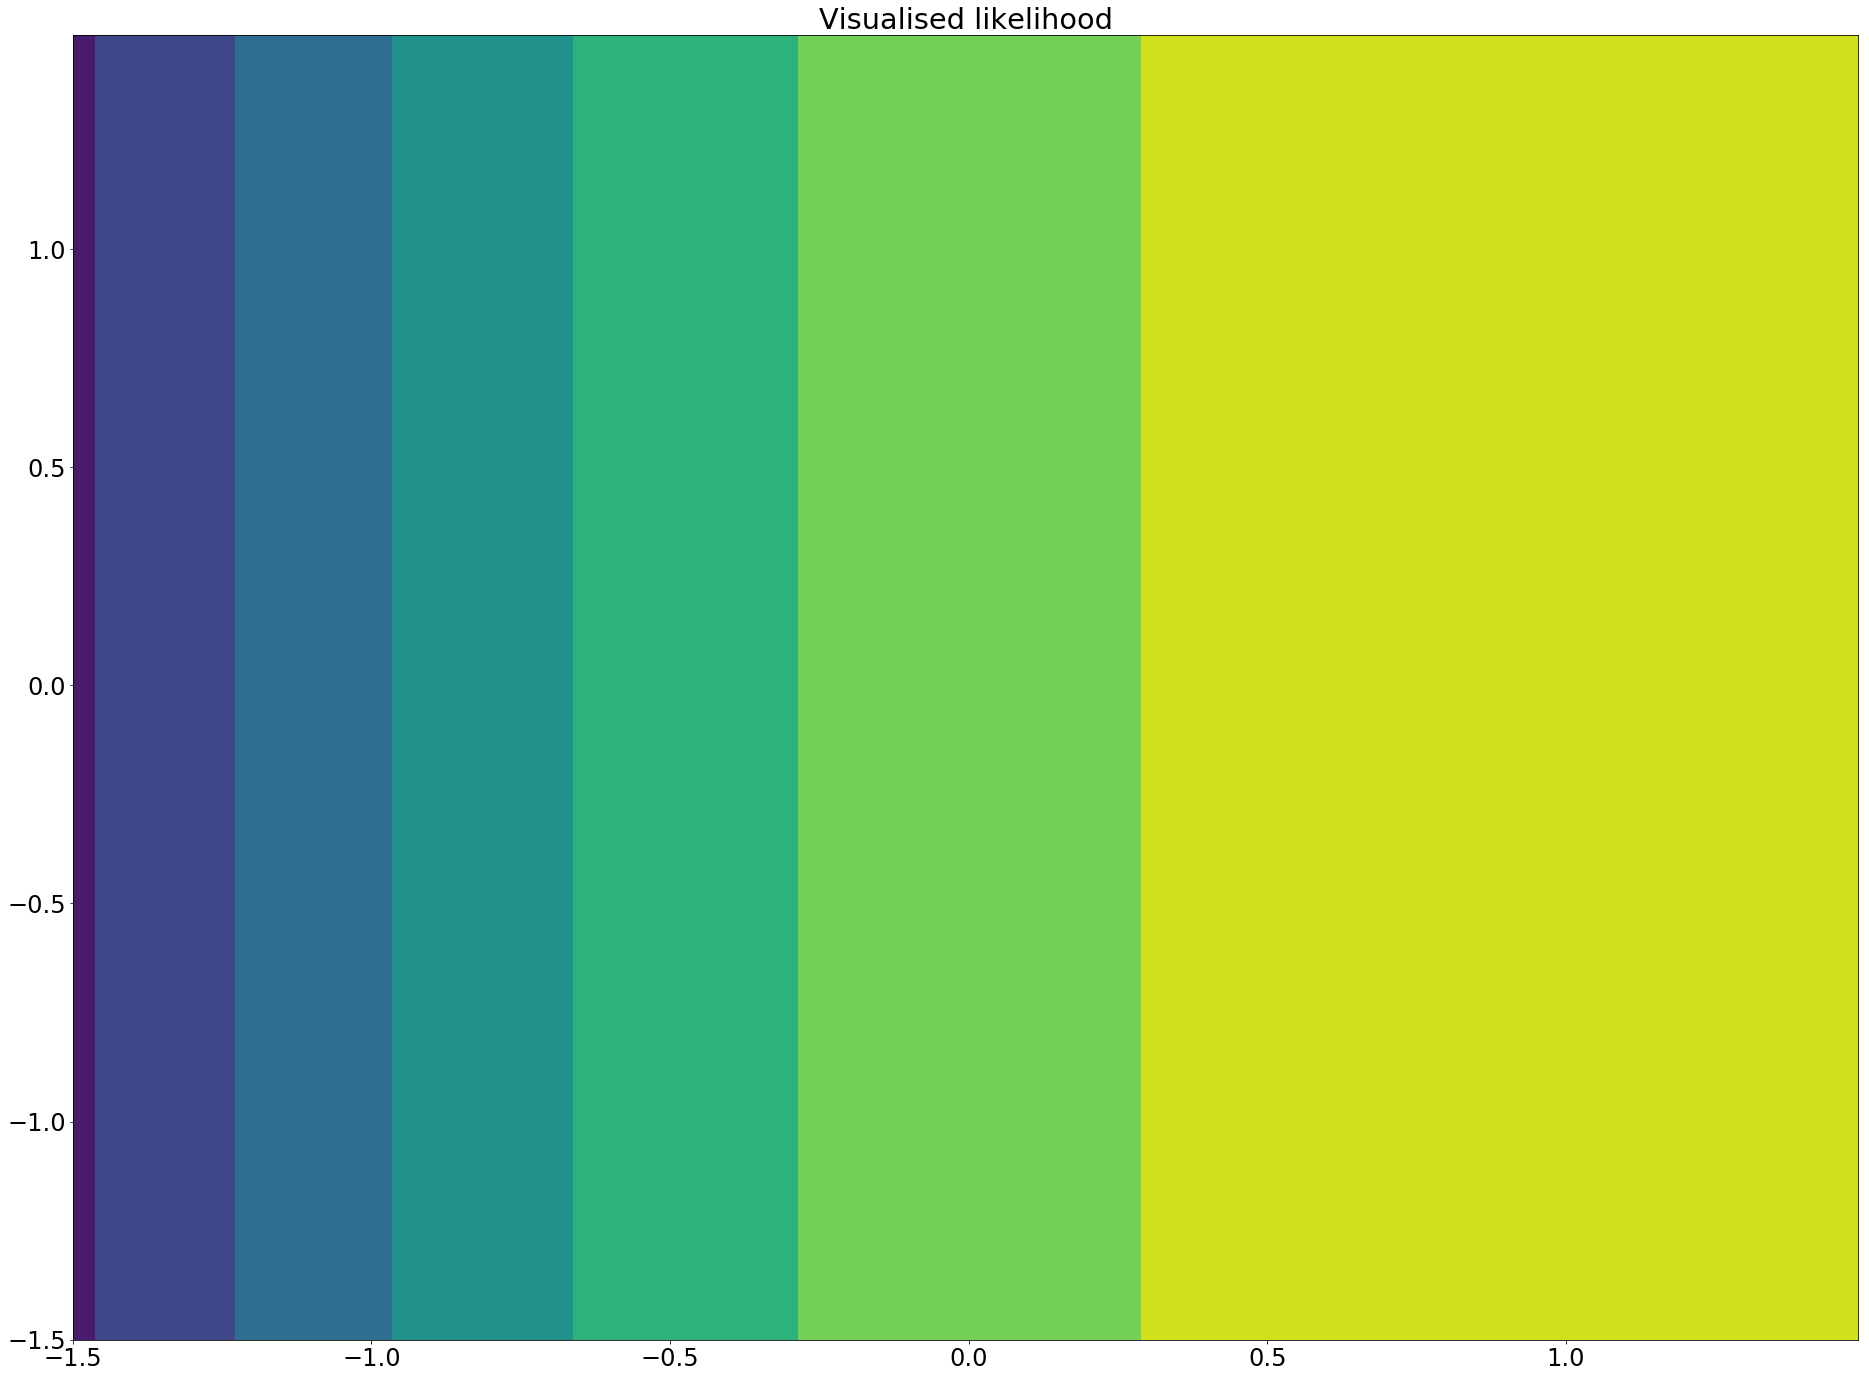

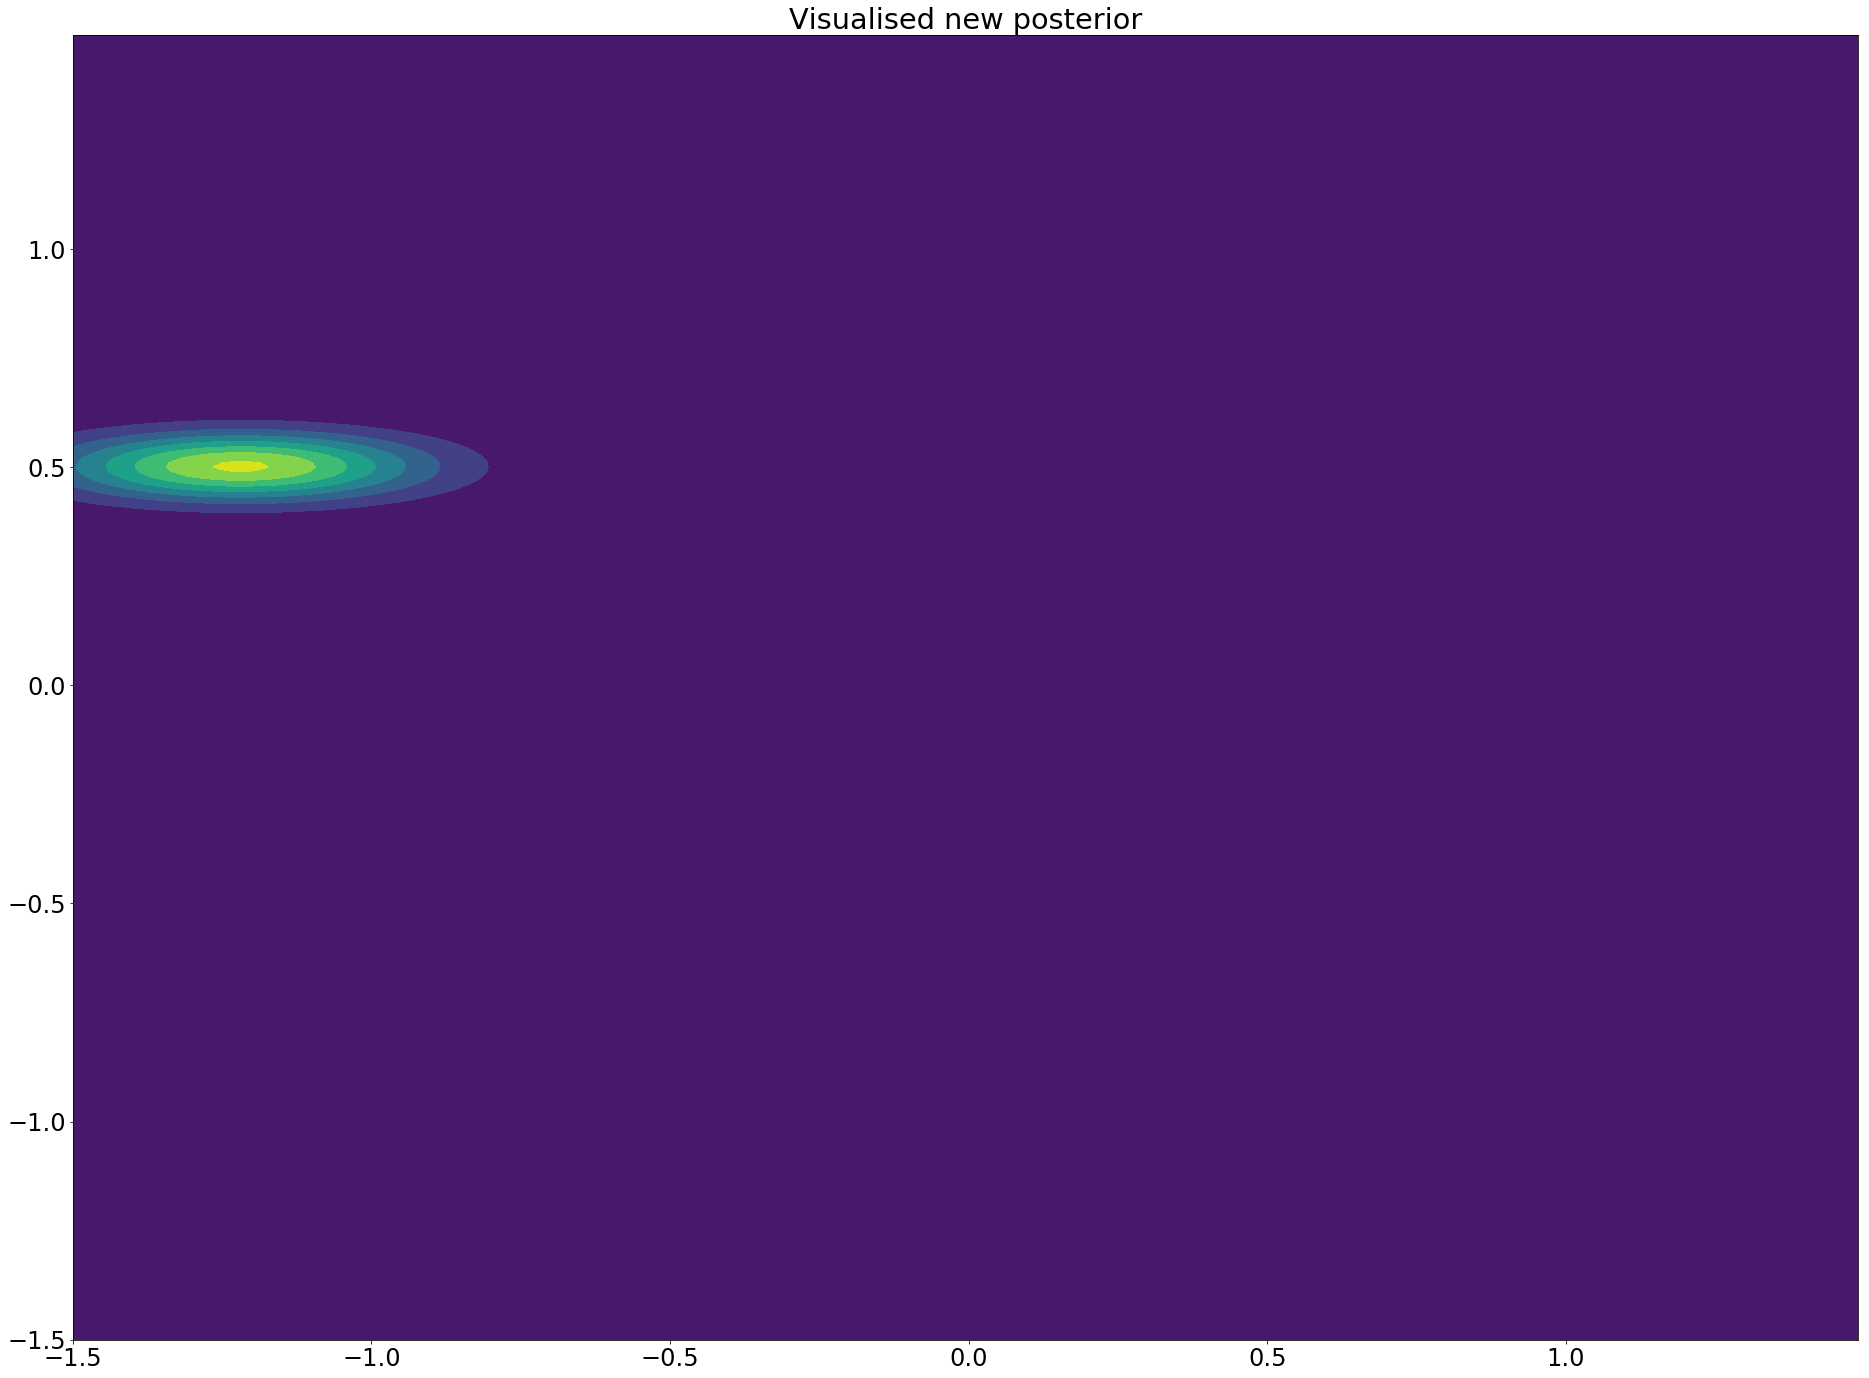

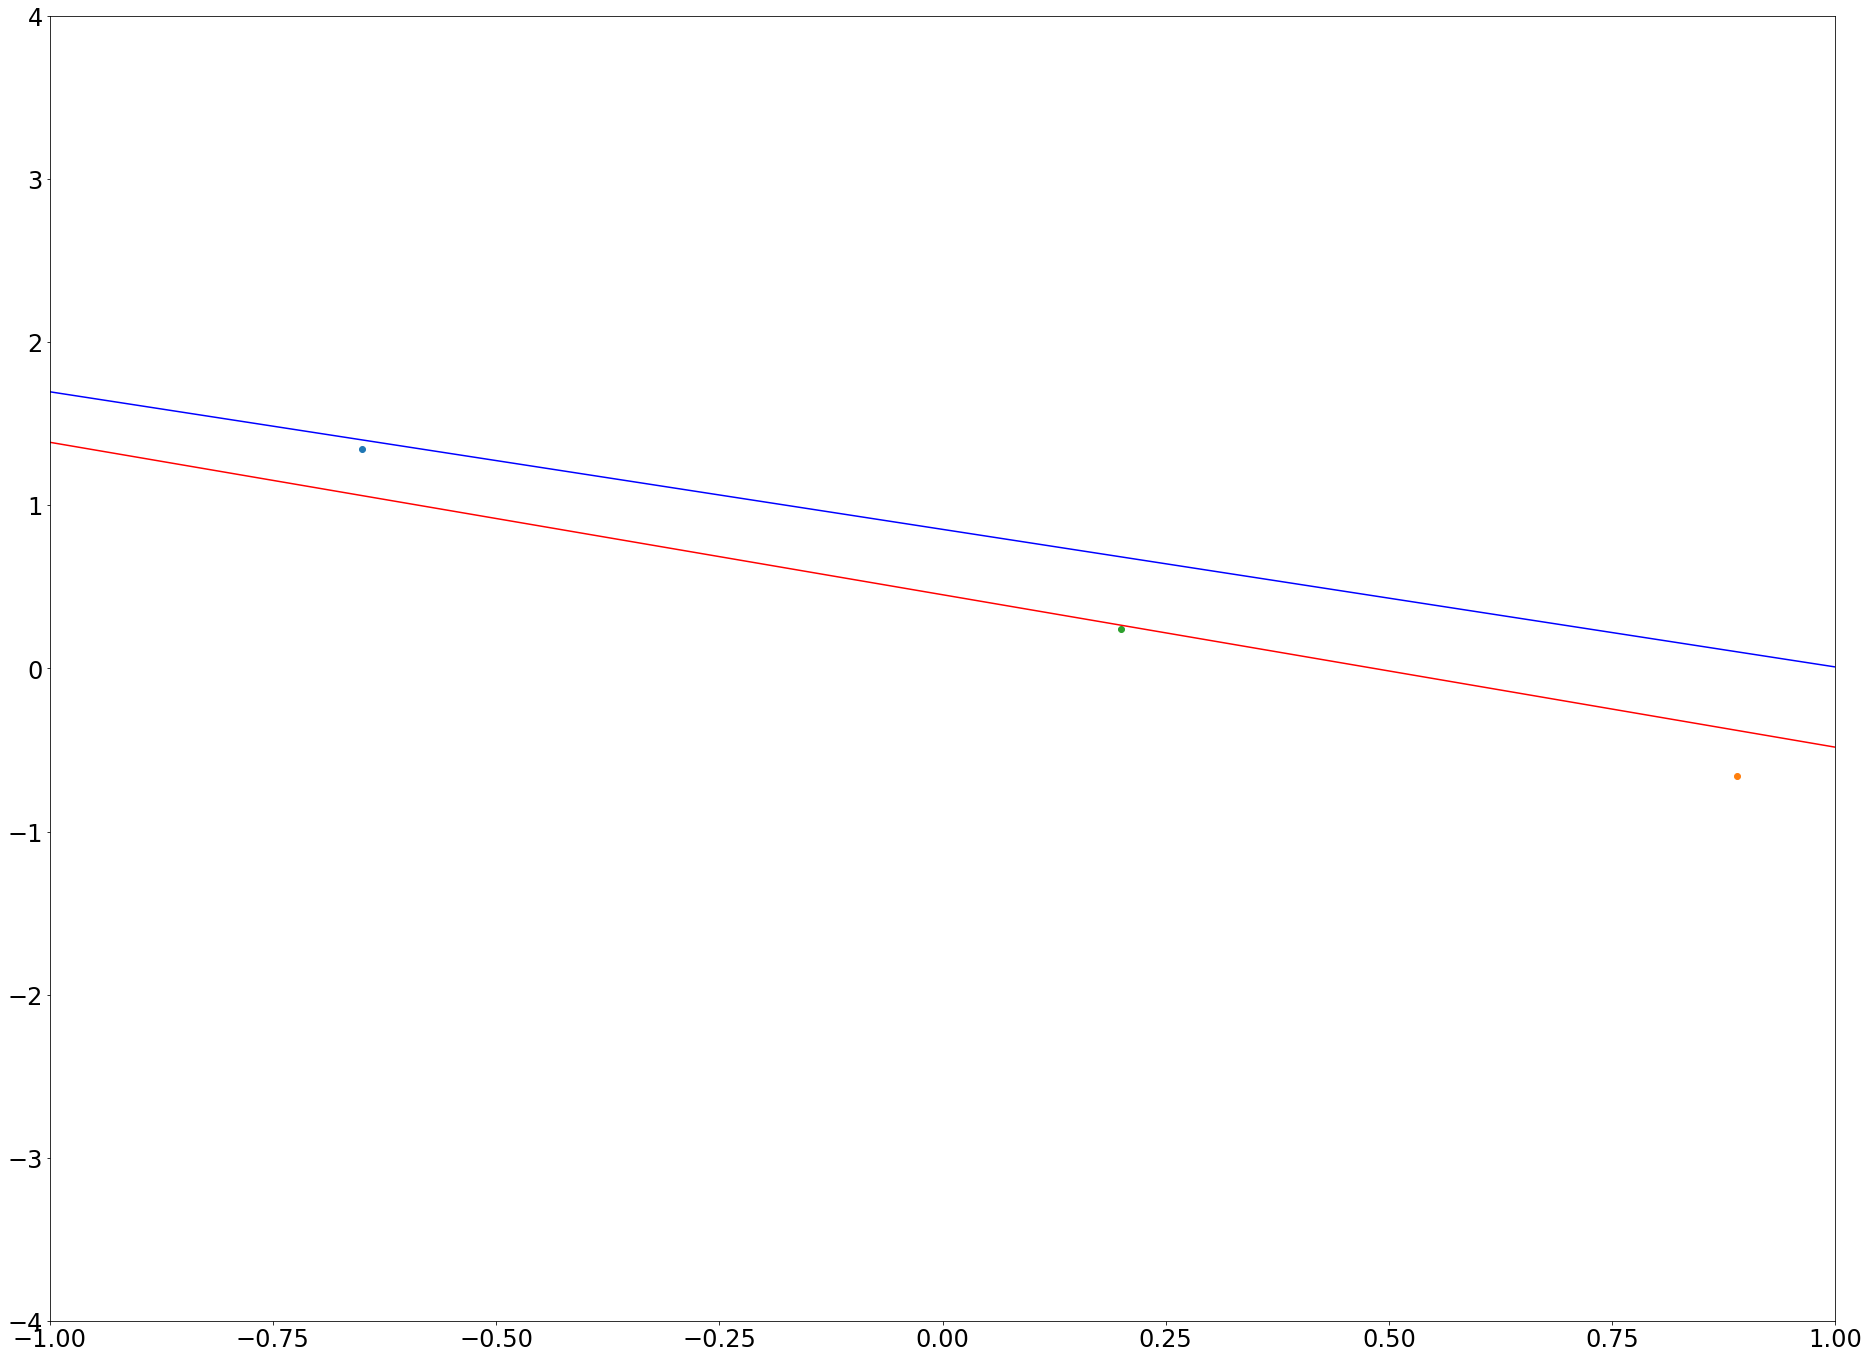

In [3]:
#likelihood = N(x|wT phi(x),beta)
delta = 0.01
sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
Prior = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
beta = (1/0.3)**2
sample = np.reshape(sample,(-1,1))
sample = np.transpose(sample)
xSamp = [0.89,1]
xSamp = np.reshape(xSamp,(-1,1))
res = np.dot(sample, xSamp)
xSamp = xSamp.T
#print(np.shape(sample))
#print(res)
Yi = -1.3*0.89 + 0.5
oldY = Yi
#print(Yi)
Likelihood = mlab.normpdf(X,res,beta)
Sn = np.linalg.inv(np.linalg.inv(0.5*np.identity(2)) + beta*xSamp.T.dot(xSamp))
#print(Sn)
Mn = Sn.dot(np.linalg.inv(0.5*np.identity(2)).dot([0,0]) + beta*xSamp.T.dot([Yi]))
#print(Mn)
Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
newW = np.random.multivariate_normal(Mn,Sn)
#print(newW)
sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
#Posterior = (Likelihood * Prior)
#Posterior = mlab.bivariate_normal(X,Y,0.26195473,0.26195473,0.11032092,0.11032092,-0.23804527)


plt.figure()
cs = plt.contourf(X,Y,Prior)
plt.title('Visualised prior')
plt.figure()
cs2 = plt.contourf(X,Y,Likelihood)
plt.title('Visualised likelihood')
plt.figure()
cs3 = plt.contourf(X,Y,Posterior)
plt.title('Visualised posterior')
plt.figure()
plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]])
plt.scatter(0.89,Yi)

#likelihood = N(x|wT phi(x),beta)
sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
#x = np.arange(-2.0, 2.0, delta)
#y = np.arange(-2.0, 2.0, delta)
#X, Y = np.meshgrid(x, y)
#Prior = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
beta = (1/0.3)**2
sample = np.reshape(sample,(-1,1))
sample = np.transpose(sample)
xSamp = [-0.65,1]
Yi = -1.3*xSamp[0] + 0.5
oldY2 = Yi
xSamp = np.reshape(xSamp,(-1,1))
res = np.dot(sample, xSamp)
xSamp = xSamp.T
#print(xSamp)

#print(np.shape(sample))
#print(res)
Likelihood = mlab.normpdf(X,res,beta)
Sn = np.linalg.inv(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)) + beta*xSamp.T.dot(xSamp))
Mn = Sn.dot(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)).dot(Mn) + beta*xSamp.T.dot([Yi]))
#Posterior = Likelihood * Posterior
Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
newW = np.random.multivariate_normal(Mn,Sn)
newW2 = np.random.multivariate_normal(Mn,Sn)

sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
sampY2 = [newW2[0]*(-1) + newW2[1],newW2[0]*(1) + newW2[1]]


plt.figure()
cs5 = plt.contourf(X,Y,Likelihood)
plt.title('Visualised likelihood')
plt.figure()
cs6 = plt.contourf(X,Y,Posterior)
plt.title('Visualised new posterior')
plt.figure()
plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]],'r')
plt.plot([-1,1],[sampY2[0],sampY2[1]],'b')
plt.scatter(-0.65,oldY2)
plt.scatter(0.89,oldY)
plt.show()

#likelihood = N(x|wT phi(x),beta)
sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
#x = np.arange(-2.0, 2.0, delta)
#y = np.arange(-2.0, 2.0, delta)
#X, Y = np.meshgrid(x, y)
#Prior = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
beta = (1/0.3)**2
sample = np.reshape(sample,(-1,1))
sample = np.transpose(sample)
xSamp = [0.2,1]
Yi = -1.3*xSamp[0] + 0.5
xSamp = np.reshape(xSamp,(-1,1))
res = np.dot(sample, xSamp)
xSamp = xSamp.T
#print(xSamp)

#print(np.shape(sample))
#print(res)
Likelihood = mlab.normpdf(X,res,beta)
Sn = np.linalg.inv(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)) + beta*xSamp.T.dot(xSamp))
Mn = Sn.dot(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)).dot(Mn) + beta*xSamp.T.dot([Yi]))
#Posterior = Likelihood * Posterior
Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
newW = np.random.multivariate_normal(Mn,Sn)
newW2 = np.random.multivariate_normal(Mn,Sn)

sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
sampY2 = [newW2[0]*(-1) + newW2[1],newW2[0]*(1) + newW2[1]]

plt.figure()
cs7 = plt.contourf(X,Y,Likelihood)
plt.title('Visualised likelihood')
plt.figure()
cs8 = plt.contourf(X,Y,Posterior)
plt.title('Visualised new posterior')
plt.figure()
plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]],'r')
plt.plot([-1,1],[sampY2[0],sampY2[1]],'b')
plt.scatter(-0.65,oldY2)
plt.scatter(0.89,oldY)
plt.scatter(0.2,Yi)
plt.show()


plt.figure()
for i in range(0,10):
    sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
    sample = np.reshape(sample,(-1,1))
    sample = np.transpose(sample)
    xz = np.random.randint(0,100)
    xz = xz / 100
    xzSamp = [xz,1]
    yz = -1.3*xzSamp[0] + 0.5
    xzSamp = np.reshape(xzSamp,(-1,1))
    res = np.dot(sample, xzSamp)
    xzSamp = xzSamp.T
    Likelihood = mlab.normpdf(X,res,beta)
    Sn = np.linalg.inv(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)) + beta*xzSamp.T.dot(xzSamp))
    Mn = Sn.dot(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)).dot(Mn) + beta*xzSamp.T.dot([yz]))
    Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
    plt.scatter(xz,yz)

newW = np.random.multivariate_normal(Mn,Sn)
newW2 = np.random.multivariate_normal(Mn,Sn)
newW3 = np.random.multivariate_normal(Mn,Sn)
newW4 = np.random.multivariate_normal(Mn,Sn)
newW5 = np.random.multivariate_normal(Mn,Sn)
newW6 = np.random.multivariate_normal(Mn,Sn)

sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
sampY2 = [newW2[0]*(-1) + newW2[1],newW2[0]*(1) + newW2[1]]
sampY3 = [newW3[0]*(-1) + newW3[1],newW3[0]*(1) + newW3[1]]
sampY4 = [newW4[0]*(-1) + newW4[1],newW4[0]*(1) + newW4[1]]
sampY5 = [newW5[0]*(-1) + newW5[1],newW5[0]*(1) + newW5[1]]
sampY6 = [newW6[0]*(-1) + newW6[1],newW6[0]*(1) + newW6[1]]

plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]],'r')
plt.plot([-1,1],[sampY2[0],sampY2[1]],'b')
plt.plot([-1,1],[sampY3[0],sampY3[1]],'r')
plt.plot([-1,1],[sampY4[0],sampY4[1]],'b')
plt.plot([-1,1],[sampY5[0],sampY5[1]],'r')
plt.plot([-1,1],[sampY6[0],sampY6[1]],'b')



# Question 13: Gaussian processes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


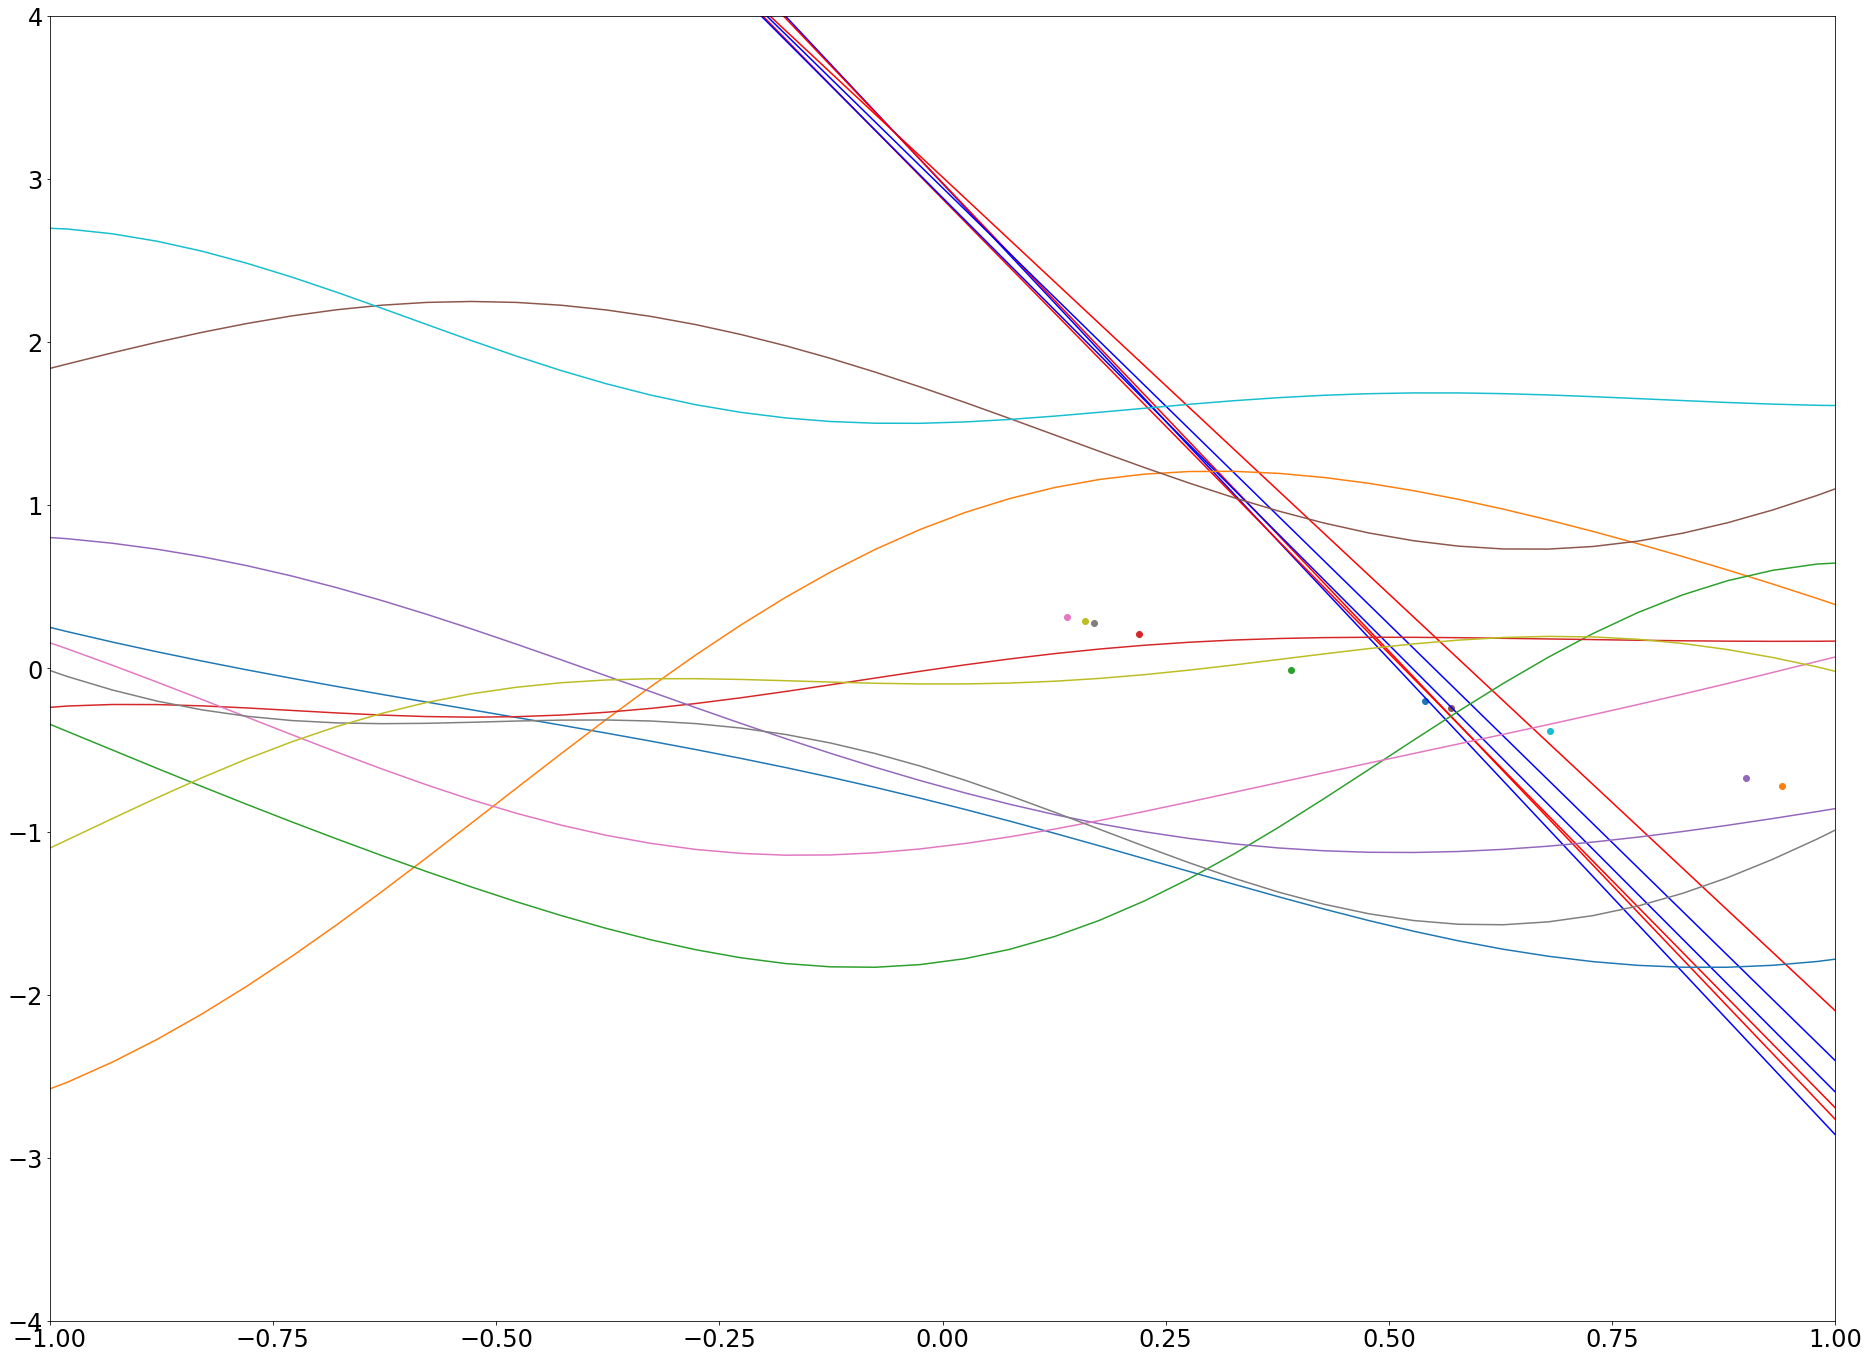

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


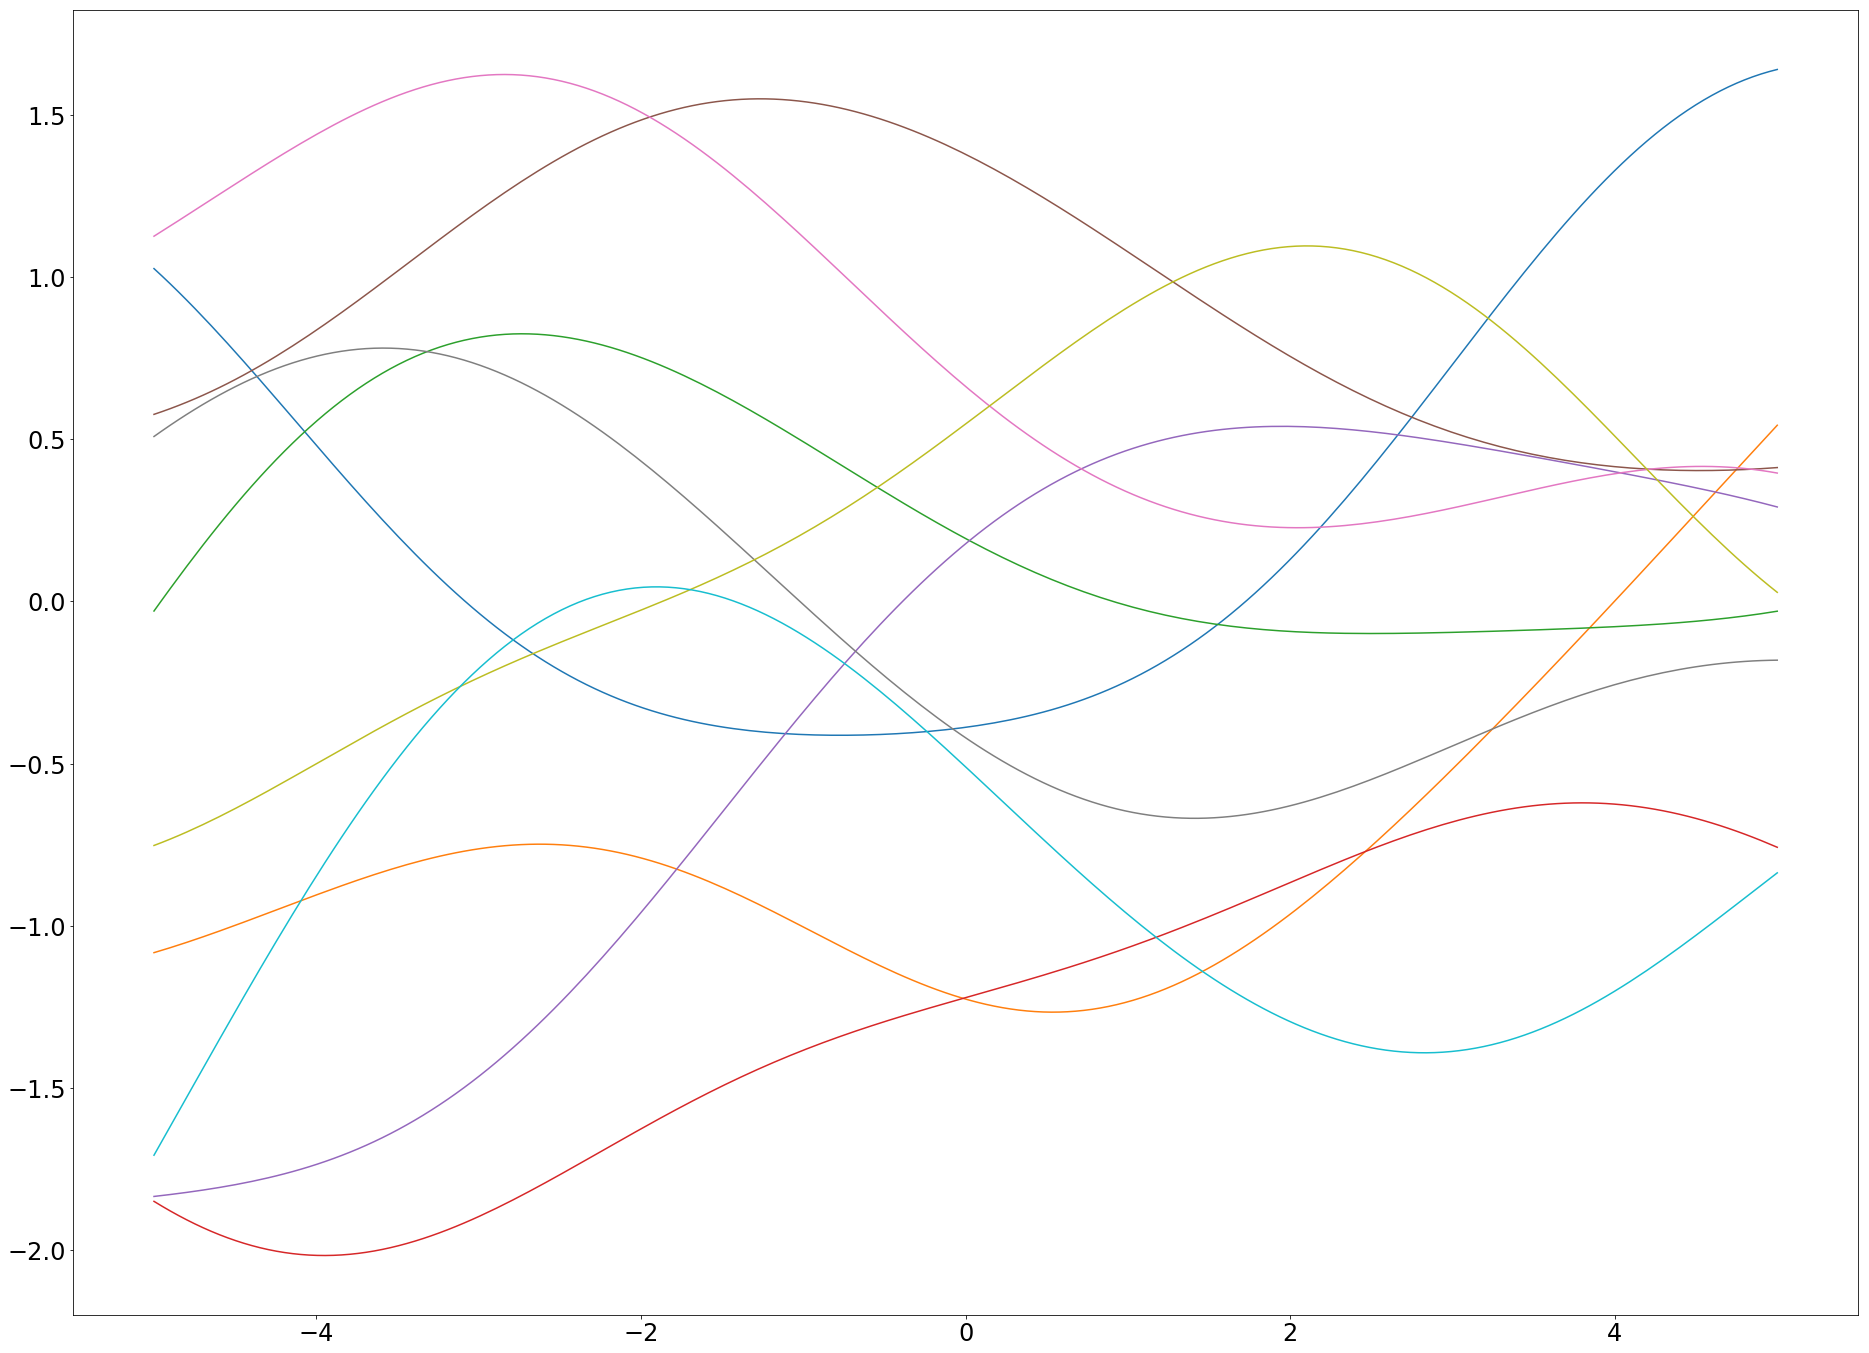

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: covariance is not positive-semidefinite.


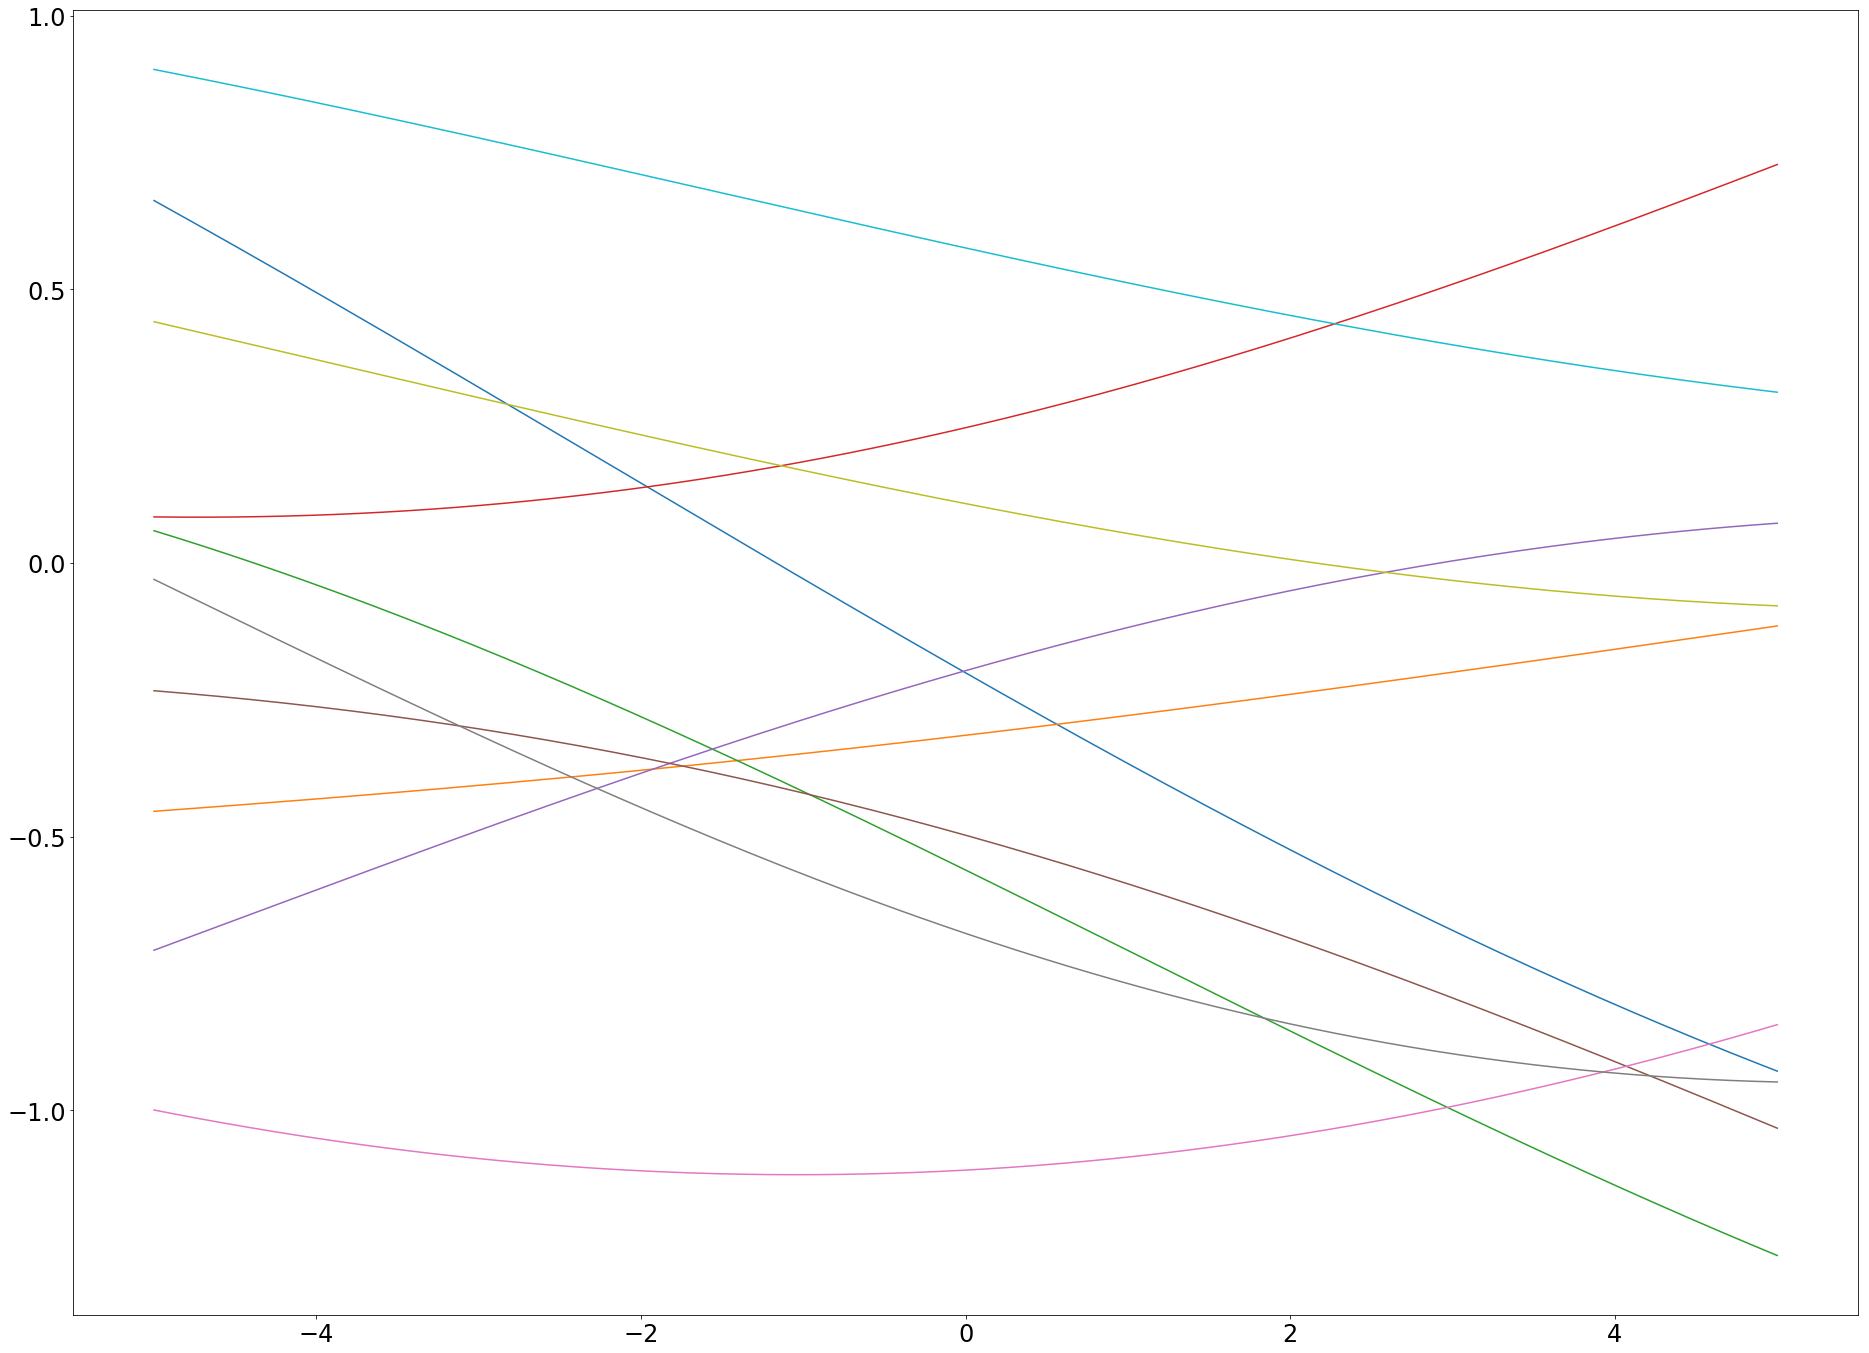

In [4]:
x = np.linspace(-5,5,200) #make data
x = x.reshape(-1,1)
mu = np.zeros(x.shape) #we assume 0 mean, but the format needs to be correct

lensc = 1
K = np.exp(-(cdist(x,x)**2)/(lensc**2))
#K = np.exp(-((x-x).T*(x-x))/lensc**2)

f = np.random.multivariate_normal(mu.flatten(),K,10)

plt.plot(x,f.T)
plt.show()

lensc = 4
K2 = np.exp(-(cdist(x,x)**2)/(lensc**2))

f = np.random.multivariate_normal(mu.flatten(),K2,10)

plt.figure()
plt.plot(x,f.T)
plt.show()


lensc = 20
K3 = np.exp(-(cdist(x,x)**2)/(lensc**2))

f = np.random.multivariate_normal(mu.flatten(),K3,10)

plt.figure()
plt.plot(x,f.T)
plt.show()

# Question 14

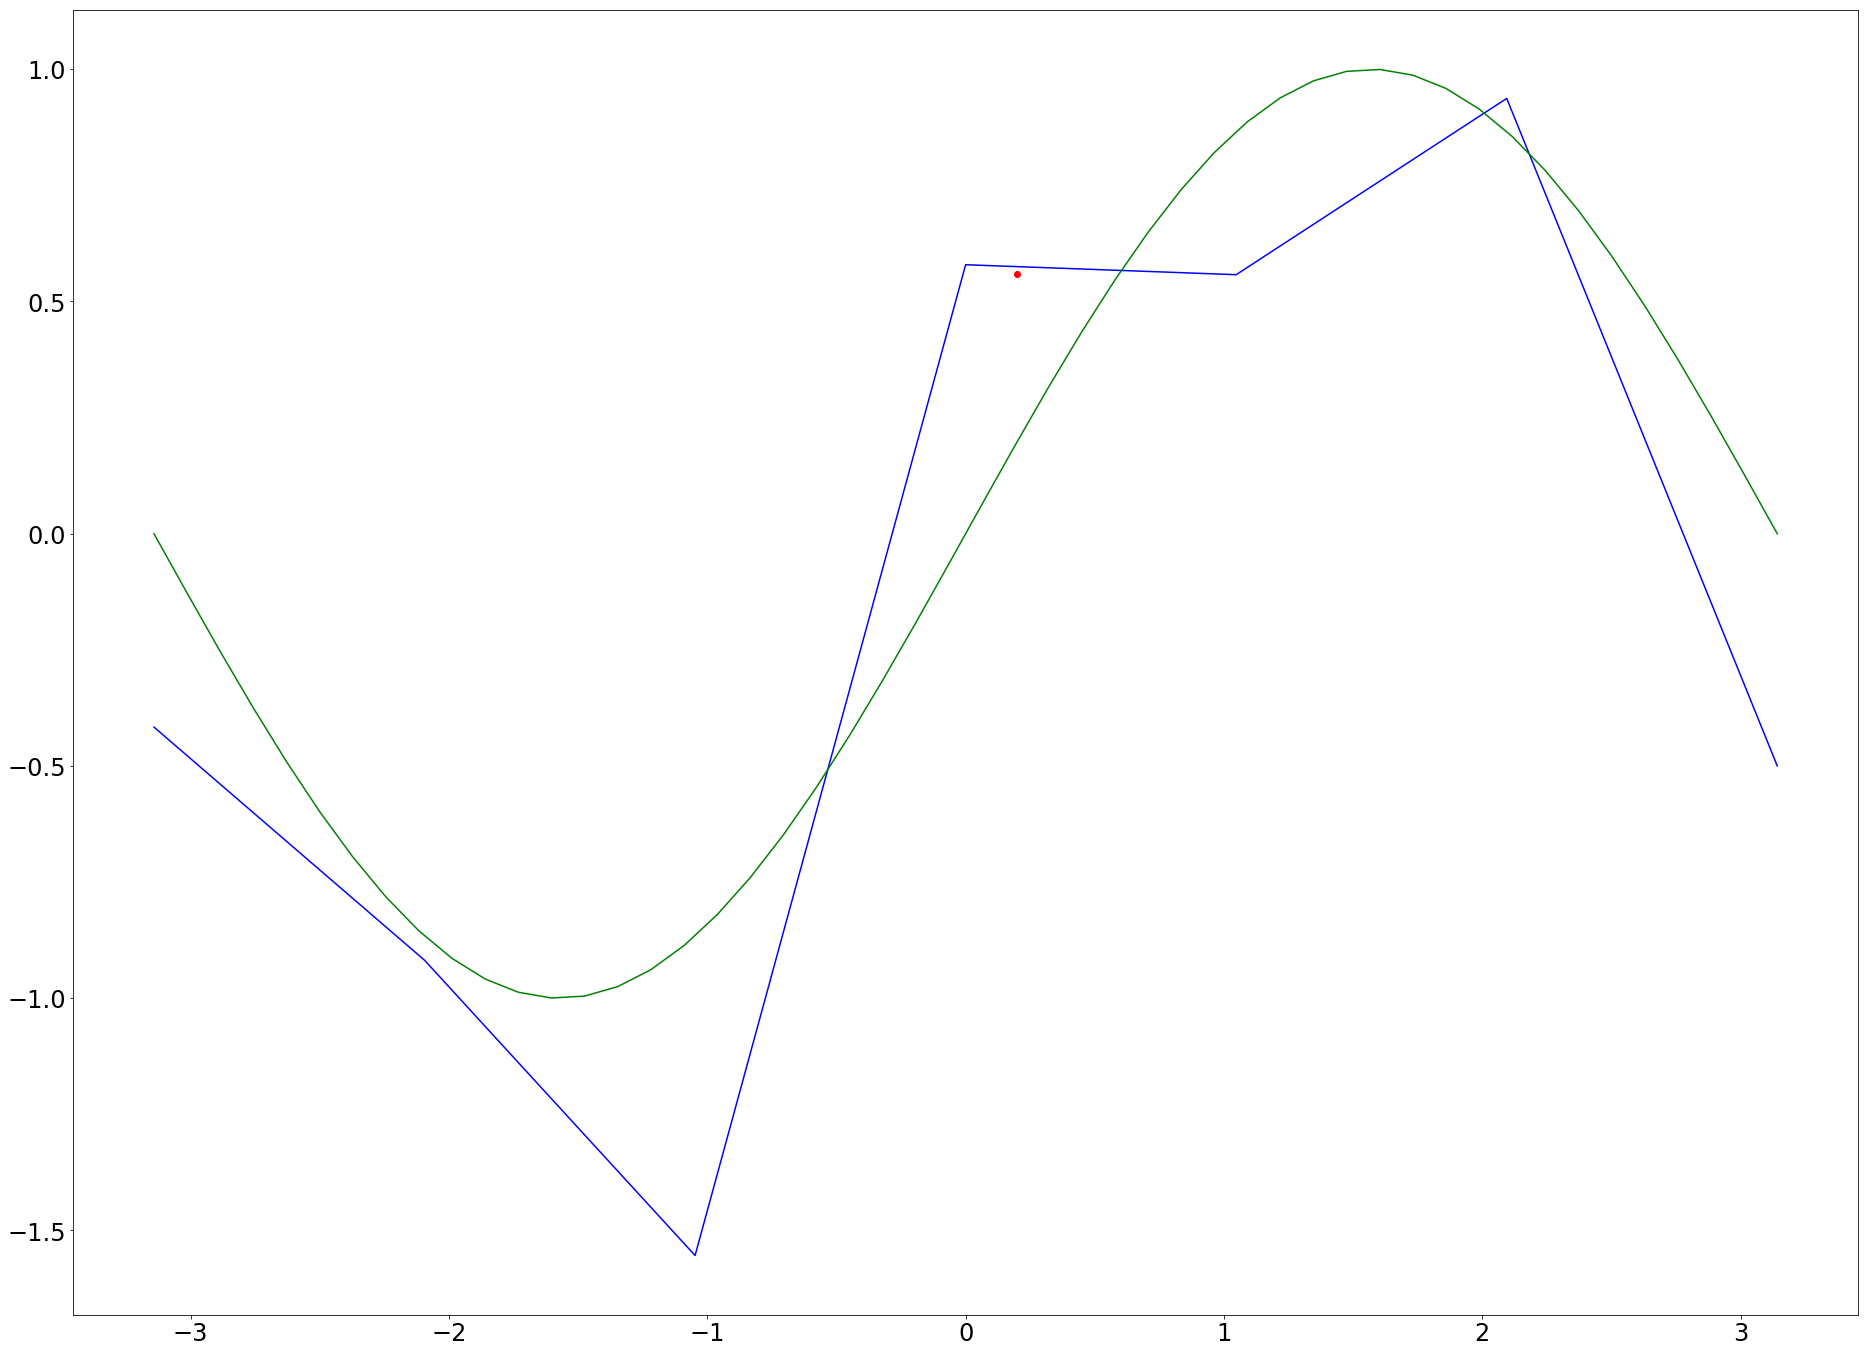

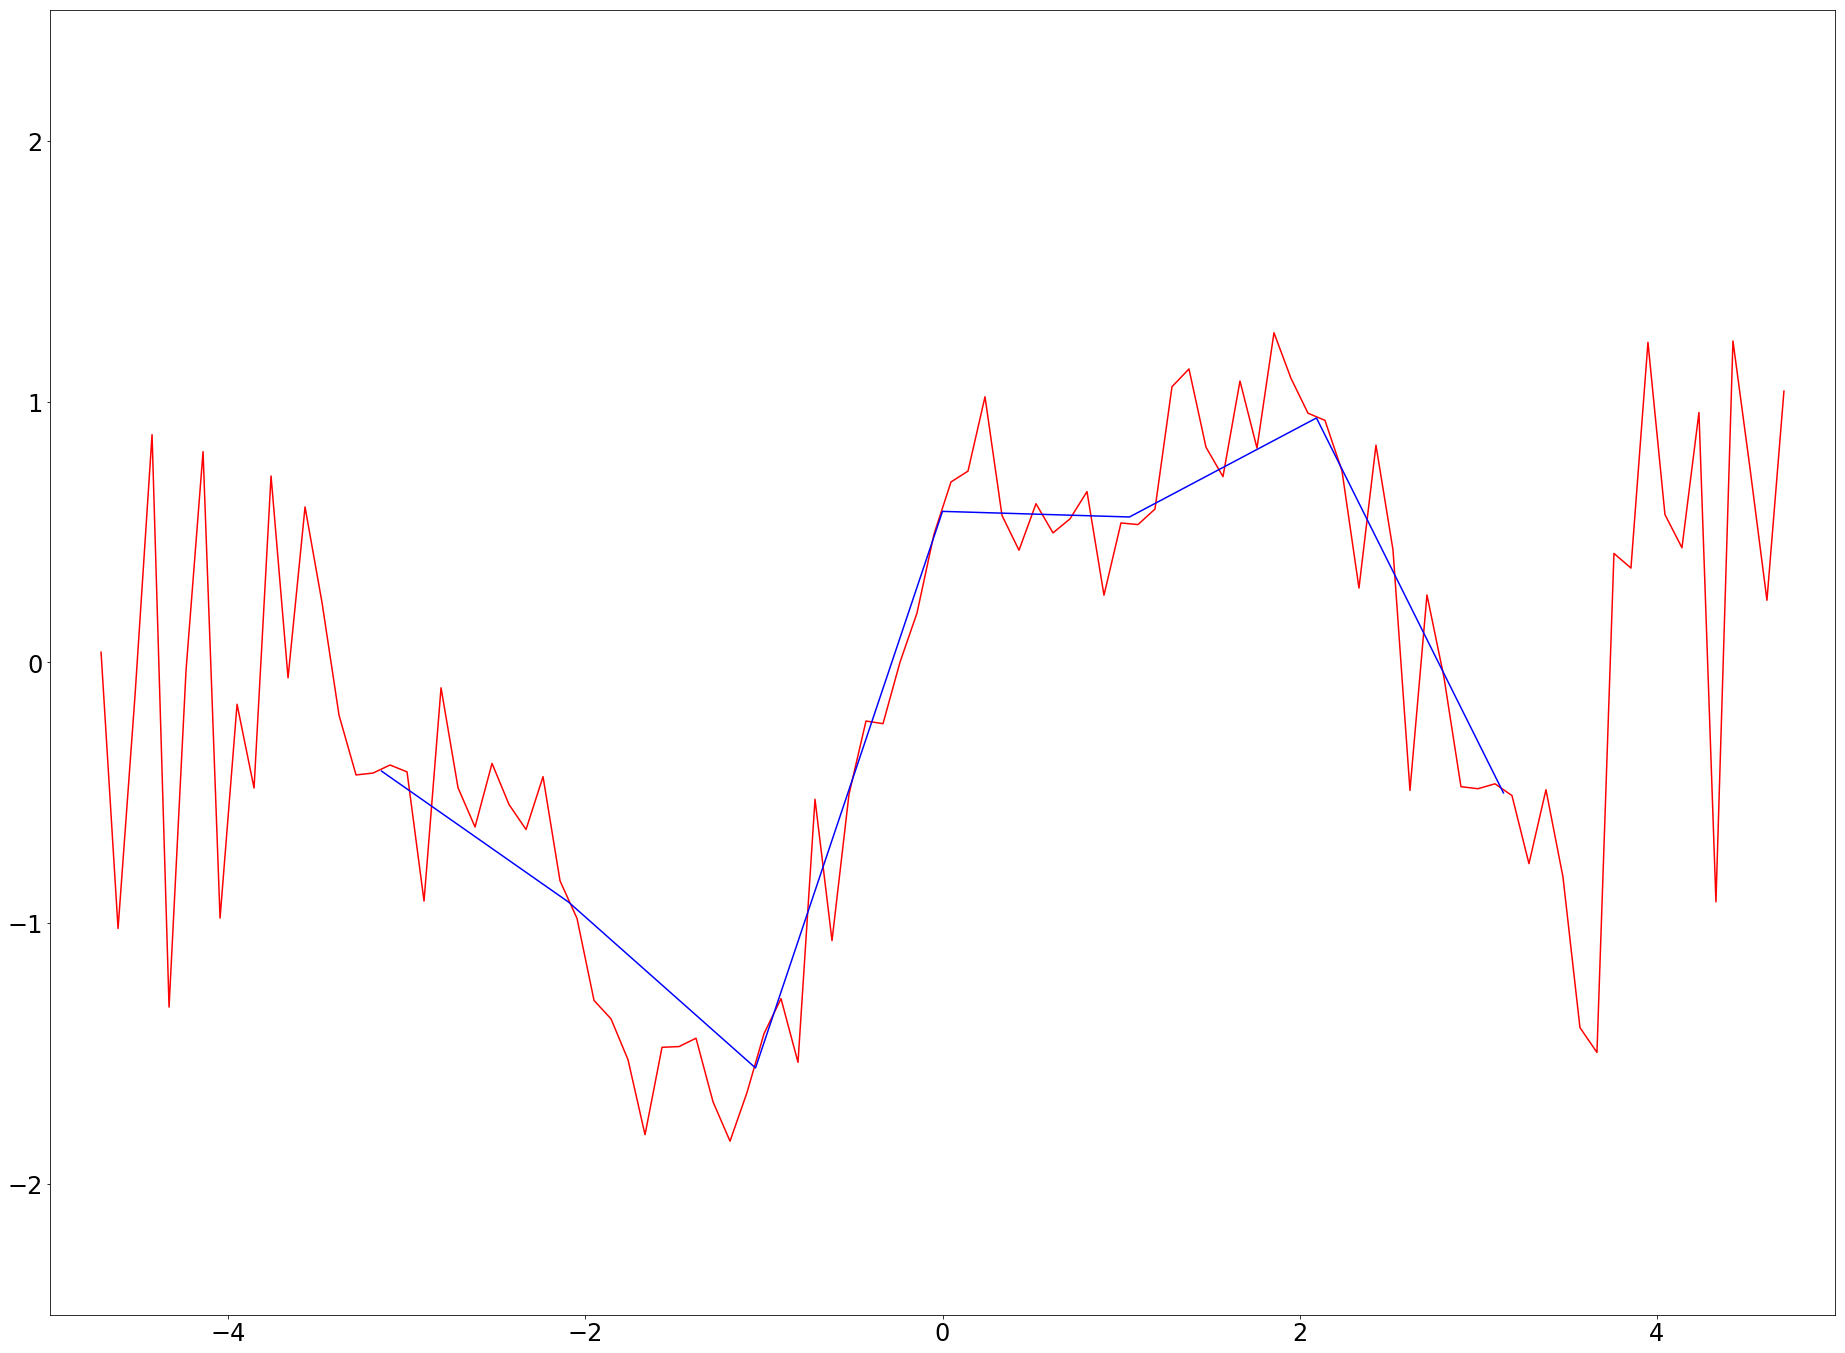

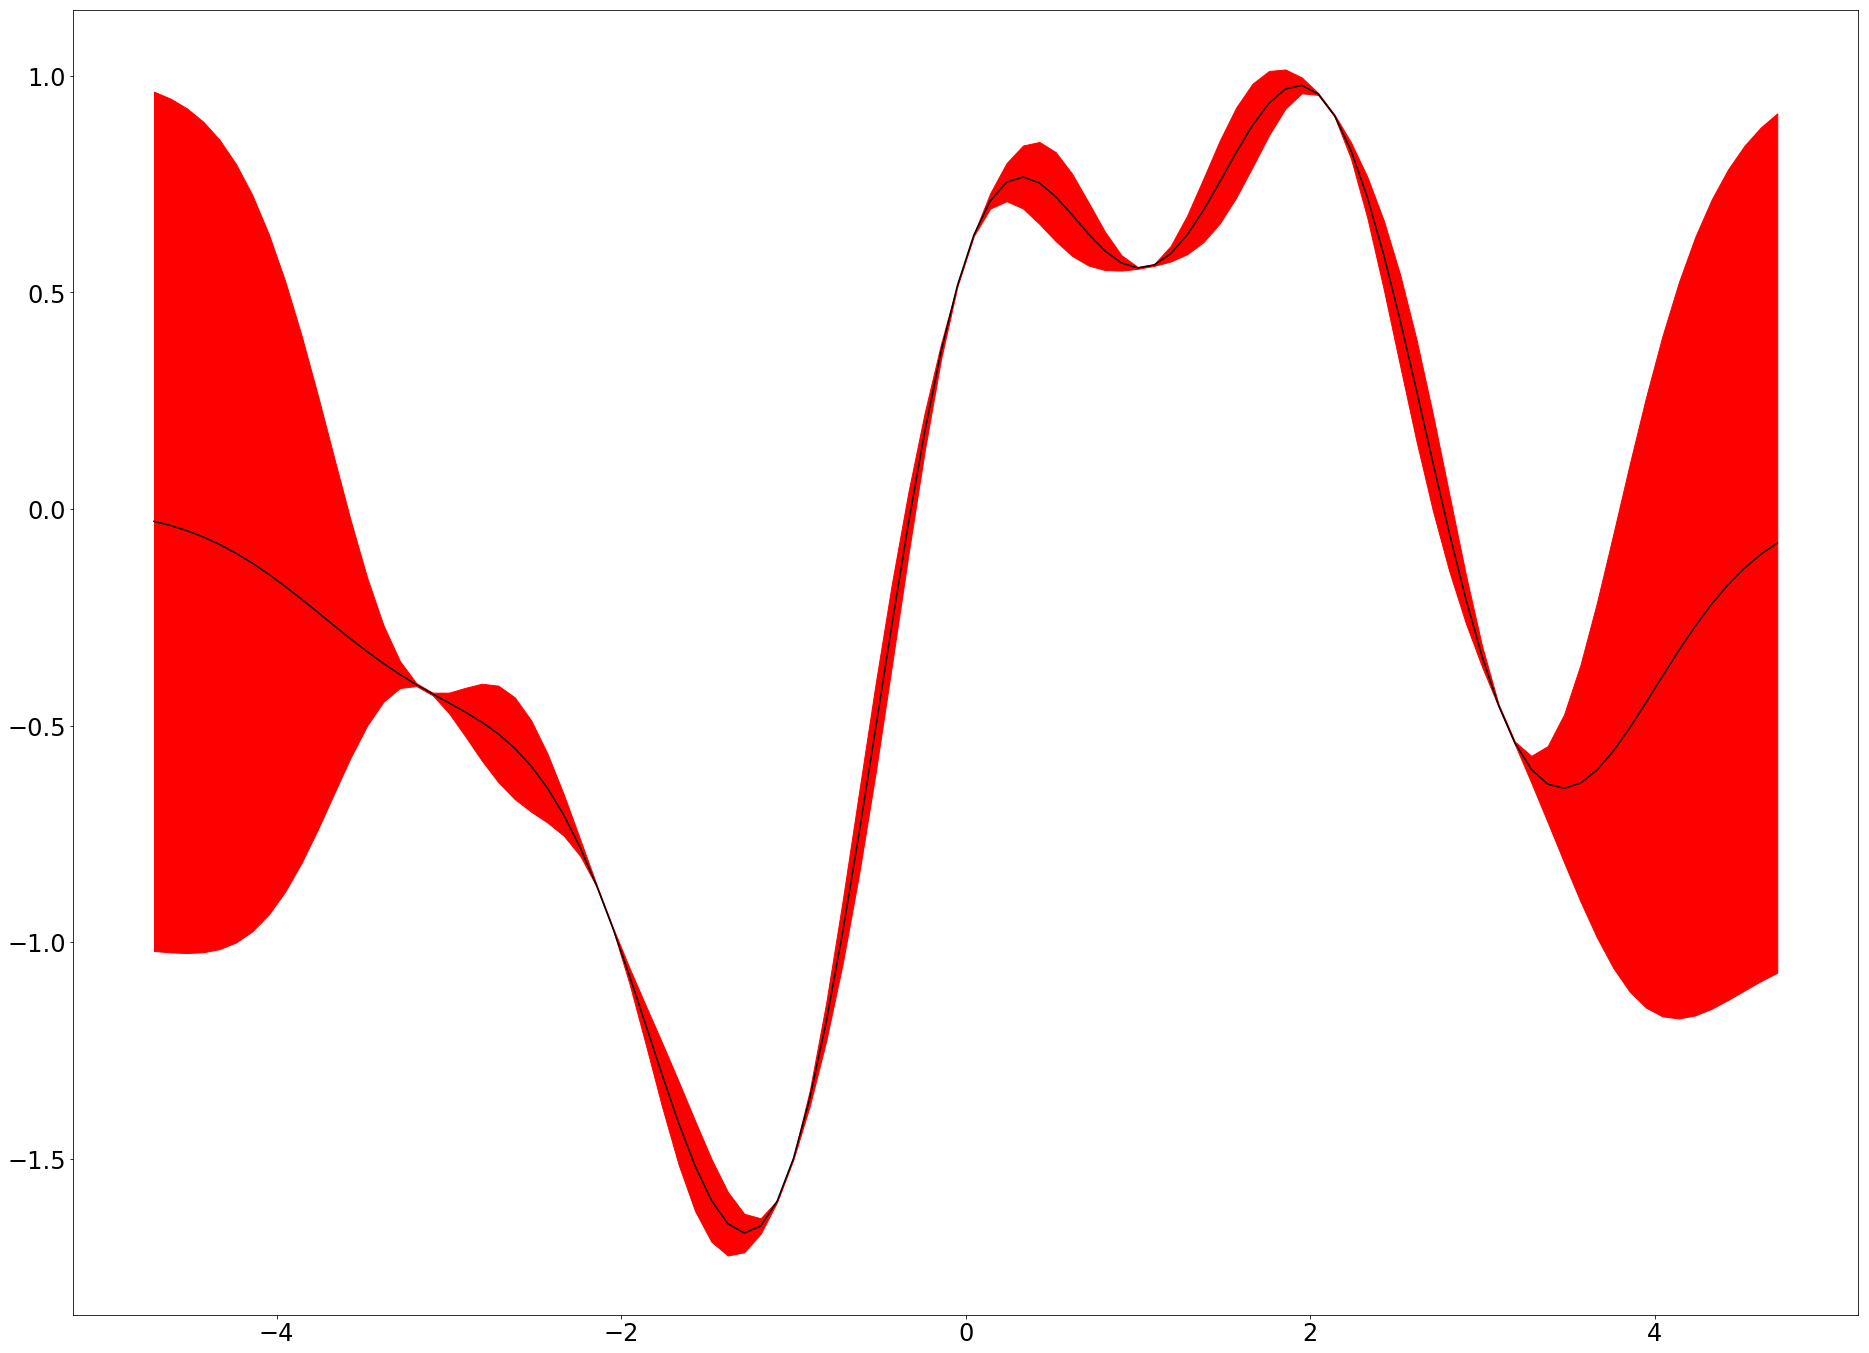

In [5]:
x = np.linspace(-np.pi,np.pi,7)
x = x.reshape(-1,1)
zx = np.linspace(-np.pi,np.pi,50)
lensc = 1
points = np.ones((1,1))*(0.2)
#print(points)
K = np.exp(-(cdist(x,x)**2)/(lensc**2))
K2 = np.exp(-(cdist((points),x)**2)/(lensc**2))
K3 = np.exp(-(cdist(points,points)**2)/(lensc**2))
Y = [np.sin(xi) + np.random.normal(0,0.5) for xi in x]
Z = [np.sin(xi) for xi in zx]
#print(K2)
Mn = K2.dot(np.linalg.inv(K).dot(Y))
Sn = K3 - K2.dot(np.linalg.inv(K).dot(K2.T))

#print(Mn)
#print(Sn)

plt.figure()
posterior = np.random.multivariate_normal(Mn.flatten(),Sn)    
plt.plot(x,Y,'b')
plt.plot(zx,Z,'g')
plt.plot(0.2,posterior,'ro')

plt.show()

plt.figure()
xi = []
yi = []
Mean = []
Sig = []
for i in np.linspace(-1.5*np.pi,1.5*np.pi,100):
    xi.append(i)
    points = np.ones((1,1))*(i)
    #print(points)
    K = np.exp(-(cdist(x,x)**2)/(lensc**2))
    K2 = np.exp(-(cdist((points),x)**2)/(lensc**2))
    K3 = np.exp(-(cdist(points,points)**2)/(lensc**2))
    #Yz = [np.sin(xi) + np.random.normal(0,0.5) for xi in x]
    #print(K2)
    Mn = K2.dot(np.linalg.inv(K).dot(Y))
    Sn = K3 - K2.dot(np.linalg.inv(K).dot(K2.T))
    posterior = np.random.multivariate_normal(Mn.flatten(),Sn)
    yi.append(posterior)
    Mean.append(Mn.flatten())
    Sig.append(Sn.flatten())
    #print(Sn.flatten())
    #plt.plot(i,posterior,'ro')
plt.plot(xi,yi,'r')    
plt.plot(x,Y,'b')
plt.axis([-5,5,-2.5,2.5])
plt.show()

plt.figure()
plt.plot(xi,Mean,'black')
plt.fill_between(xi,np.add(Mean,Sig).flatten(),np.subtract(Mean,Sig).flatten(),color='r')
plt.show()

# Question 21 

In [6]:
A = np.reshape([np.random.normal(0,1) for x in range(10) for y in range(2)],(10,2))
#print(A)
x = np.linspace(0,4*np.pi,100).reshape(-1,1)
Ynon = np.hstack((x*np.sin(x),x*np.cos(x)))
ylin = np.dot(A,Ynon.T).T
#print(ylin.shape)
x0 = np.reshape([np.random.normal(0,1) for x in range(10) for y in range(2)],(20))
print(x0.shape)
def f(x,*args):
    x = np.reshape(x,(2,10))
    C = np.dot(x.T,x)
    print(C.shape)
    val = np.log(np.linalg.det(C) + np.trace(np.dot(ylin,np.dot(np.linalg.inv(C),ylin.T))))
    return val

def dfx(x,*args):
    x = np.reshape(x,(10,2))
    print(x.shape)
    Cinv = np.linalg.inv(np.dot(x,x.T))
    print(Cinv.shape)
    yyT = np.dot(ylin.T,ylin)
    for i in range(2):
        for j in range(10):
            Jl = np.zeros((2,10))
            Jr = np.zeros((10,2))
            Jl[i][j] = 1
            Jr[j][i] = 1
            print(Jl.shape)
            print(Jr.shape)
            print(yyT.shape)
            l = np.dot(x,Jl)
            r = np.dot(Jr,x.T)
            print(l.shape)
            print(r.shape)
            otrDet = np.add(l,r)
            print(otrDet.shape)
            val = np.trace(np.dot(yyT,np.dot(-1*(Cinv),np.dot(otrDet,Cinv))))                       
            print(val) 
                    
    return val
x_star = opt.fmin_cg(f,x0,fprime=dfx)

(20,)
(10, 2)
(10, 10)
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
4.4821873782e+19
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
-2.77643230117e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
3.3613942449e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
7.61179897244e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
9.97588929363e+18
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
-2.12825330181e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
2.82213723443e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
7.81467001492e+19
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
9.59947256057e+19
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
-1.26217601851e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
1.45290735185e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
3.66707231113e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
4.23631580582e+20
(2, 10)
(10, 2)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
8.59821320757e

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


LinAlgError: Singular matrix